Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore


In [5]:
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


importing the dataset from github directly

defining the features
R - Runs,
AB - At Bats, 
H - Hits, 
2B - Doubles, 
3B - Triples, 
H - Homeruns, 
BB - Base on balls (Walks), 
SO - Strikeouts, 
SB - Stolen Bases, 
RA - Runs Allowed, 
ER - Earned Runs, 
ERA - Earned Run Average, 
SHO - Shutouts, 
SV - Saves, 
CG - Complete Games and
E - Errors

# Exploratory Data Analysis (EDA)


In [9]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [10]:
df.rename(columns={'W' : 'Wins', 
                   'R' : 'Runs Scored', 
                  'AB' : 'At Bat', 
                   'H' : 'Hits', 
                  '2B' : 'Doubles', 
                  '3B' : 'Triples',
                  'HR' : 'Home Runs', 
                  'BB' : 'Base on Balls', 
                  'SO' : 'Strike Outs', 
                  'SB' : 'Stolen Base',
                  'RA' : 'Runs Average', 
                  'ER' : 'Earned Runs', 
                 'ERA' : 'Earned Run Average', 
                  'CG' : 'Complete Game',
                 'SHO' : 'Shut Outs', 
                  'SV' : 'Saves', 
                   'E' : 'Errors'}, 
          inplace=True)

df.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


1B – Single: hits on which the batter reaches first base safely without the contribution of a fielding error
2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error
3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.
H – Hit: reaching base because of a batted, fair ball without error by the defense
R – Runs scored: times reached home plate legally and safely
W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work (also related: winning percentage)
E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result
ER – Earned run: number of runs that did not occur as a result of errors or passed balls
K (or SO) – Strikeout: number of batters who received strike three
SHO – Shutout: number of complete games pitched with no runs allowed
HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched
CG – Complete game: number of games where player was the only pitcher for their team
SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings
SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense



In the above step, I have updated the column names with the actual names, so that we can understand the data. 
Here 'Wins' column is our target and other columns are features.

In [11]:
df.shape

(30, 17)

Our data has 30 raws and 17 coloumns. As the data is small and every column is important to get the desired outcome, we will need to work on all the columns and their values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs Scored         30 non-null     int64  
 2   At Bat              30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Home Runs           30 non-null     int64  
 7   Base on Balls       30 non-null     int64  
 8   Strike Outs         30 non-null     int64  
 9   Stolen Base         30 non-null     int64  
 10  Runs Average        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Game       30 non-null     int64  
 14  Shut Outs           30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

Great to see that there are no object data type, only integar and float. No encoding needed.

In [14]:
df.isnull().sum()

Wins                  0
Runs Scored           0
At Bat                0
Hits                  0
Doubles               0
Triples               0
Home Runs             0
Base on Balls         0
Strike Outs           0
Stolen Base           0
Runs Average          0
Earned Runs           0
Earned Run Average    0
Complete Game         0
Shut Outs             0
Saves                 0
Errors                0
dtype: int64

No null values present in our data. We can now work on the data as it is. 

In [15]:
df.describe()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wins,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
Runs Scored,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
At Bat,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
Hits,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
Doubles,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
Triples,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
Home Runs,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
Base on Balls,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
Strike Outs,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
Stolen Base,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


just checking the data in transpose so that it's visible in a single window

In [17]:
df.skew()

Wins                  0.047089
Runs Scored           1.200786
At Bat                0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Home Runs             0.516441
Base on Balls         0.158498
Strike Outs          -0.156065
Stolen Base           0.479893
Runs Average          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Game         0.736845
Shut Outs             0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

The acceptable range for skewness is between +/-0.5. We cann see the columns such as Runs Scored, Hits, Runs Average, Earned Runs, Earned Run Average, Complete Game, Saves and Errors being slightly out of this range.

# Visualization

Strip plot

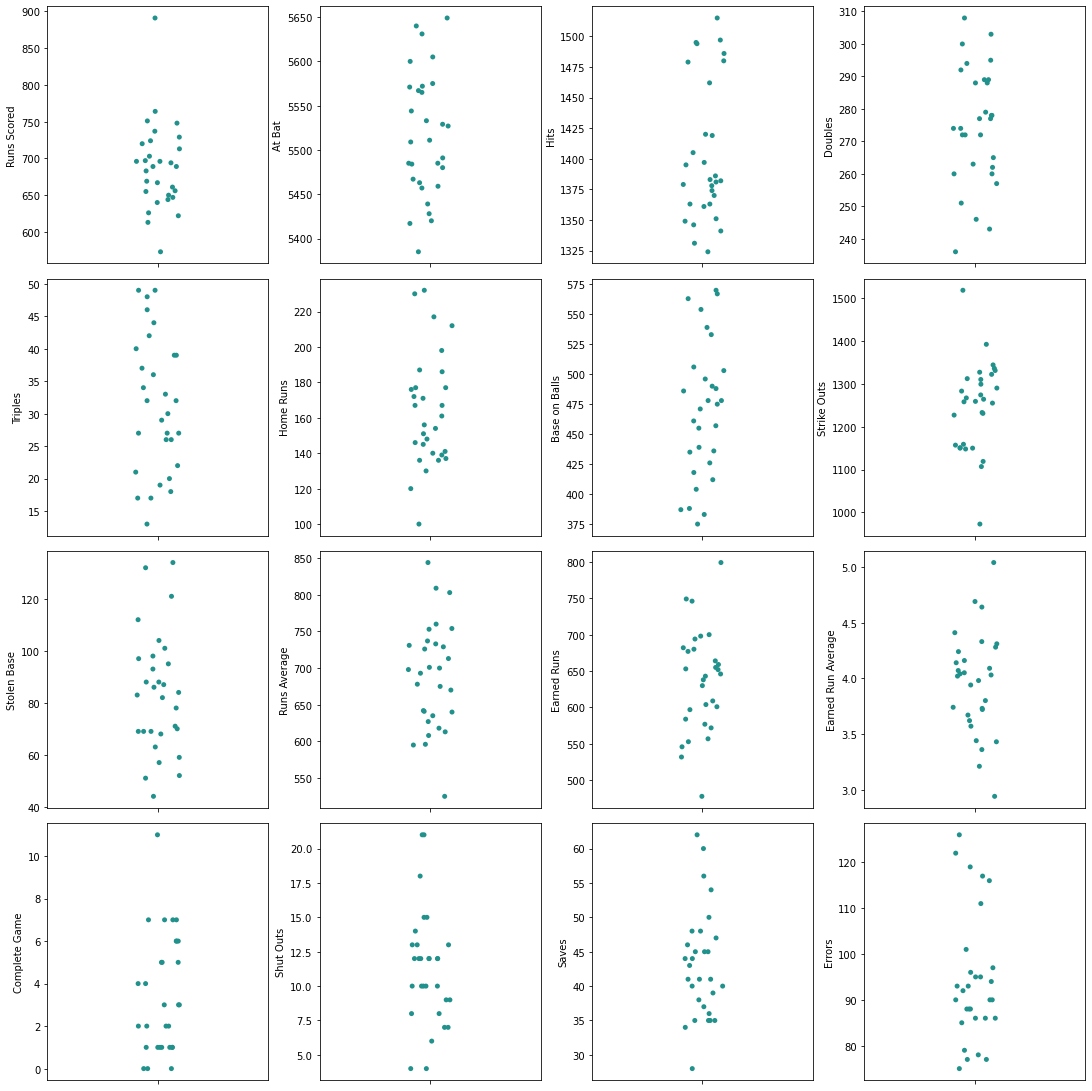

In [18]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.stripplot(y=col, data=df, ax=ax[index], palette="viridis")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

We can see columns Runs Scored, Strike Outs, Complete Game with single data points further away from the general accumulation indicating towards the presence of ouliers.

Boxplot

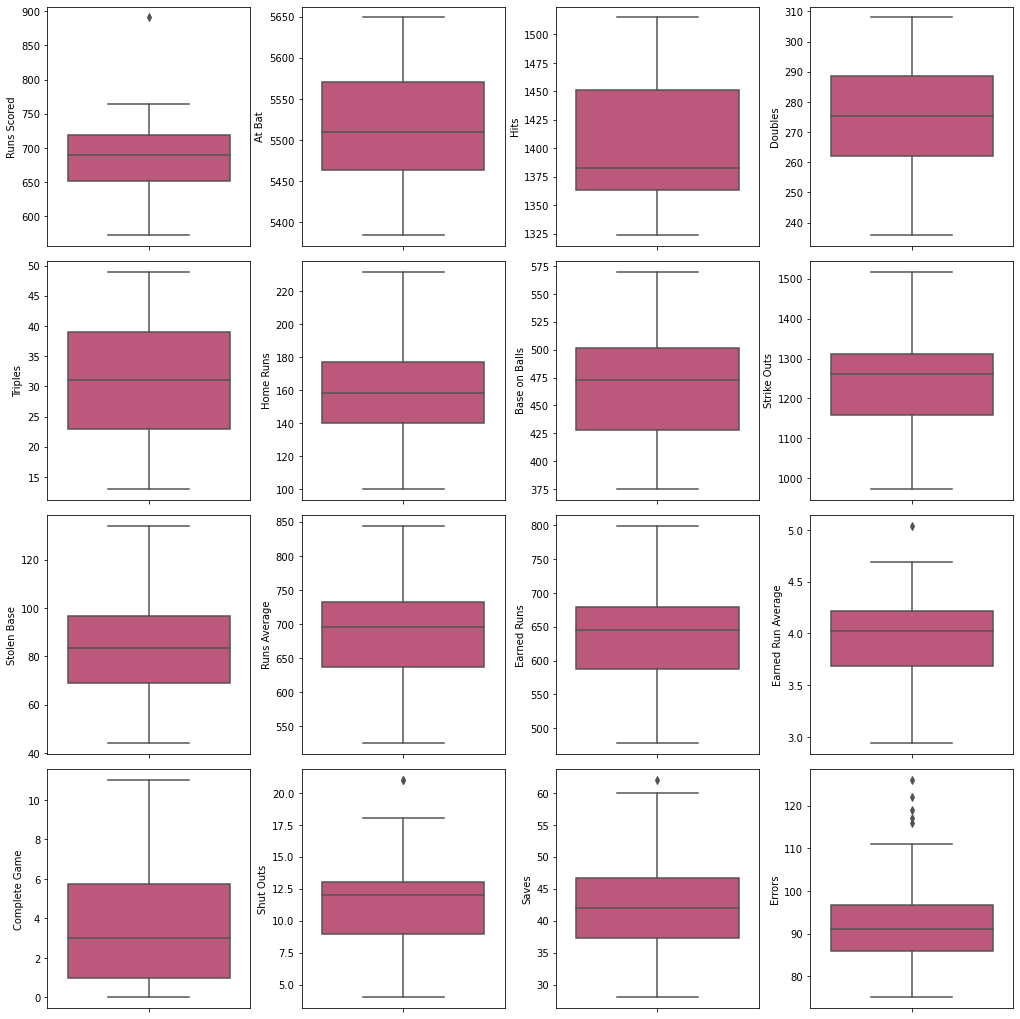

In [21]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(14,14))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

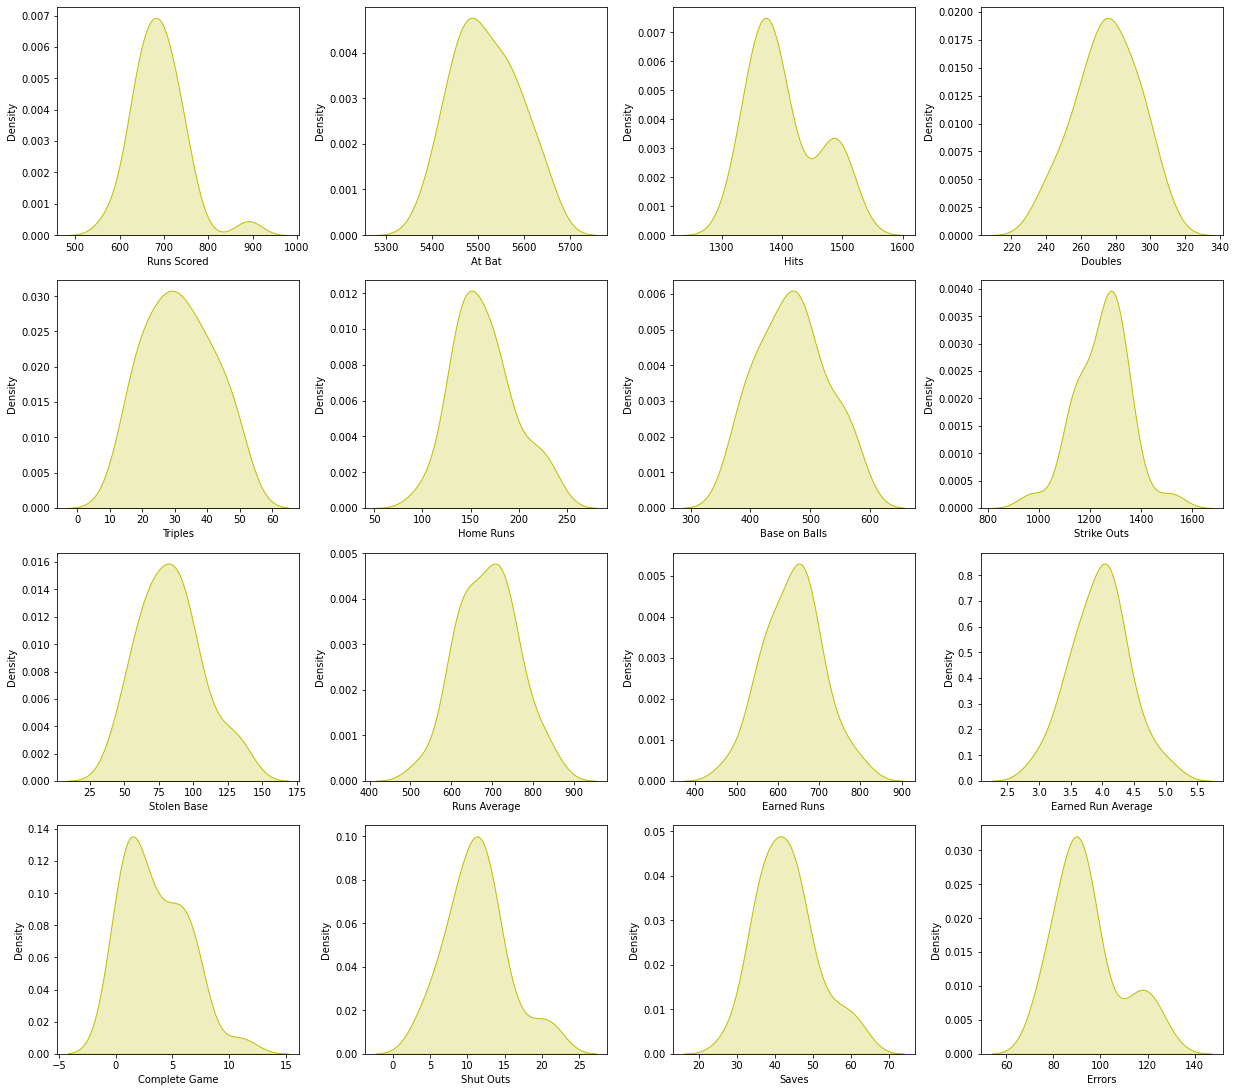

In [22]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(17,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

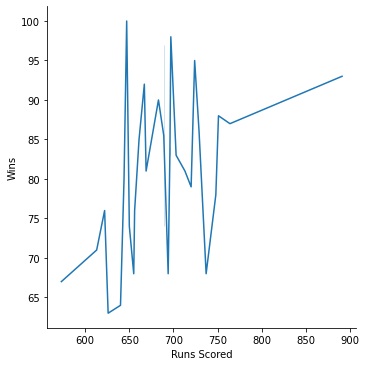

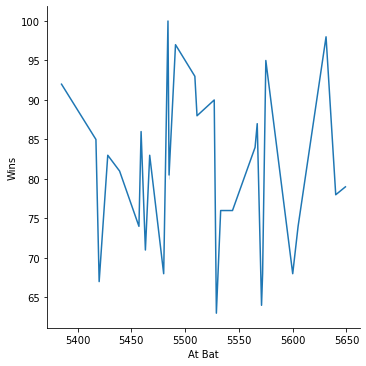

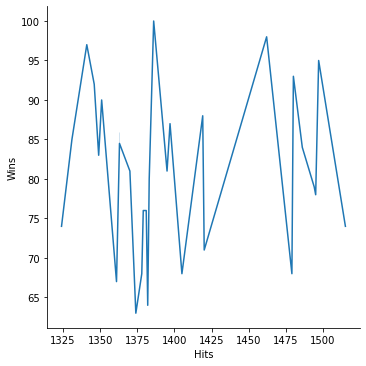

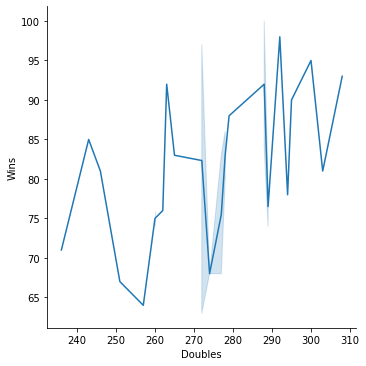

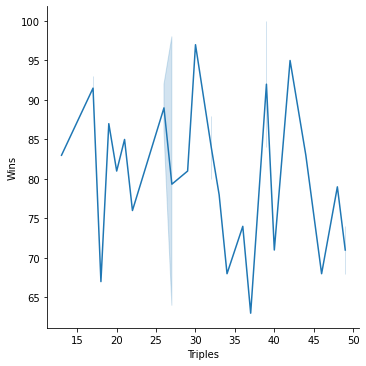

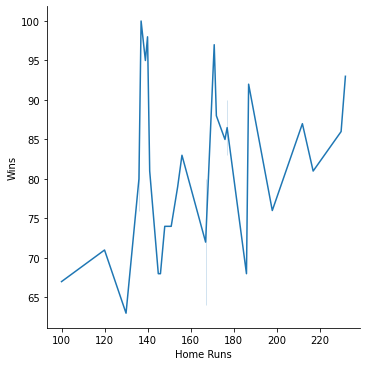

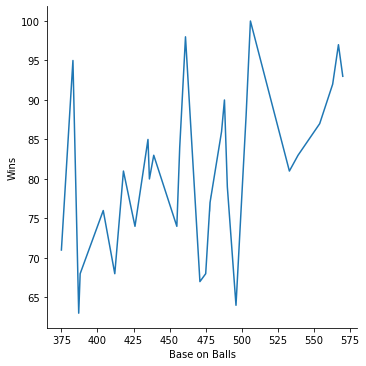

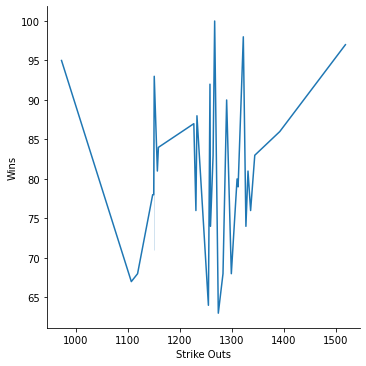

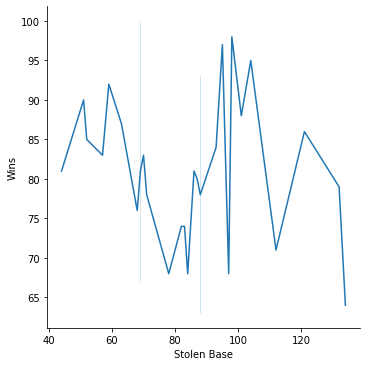

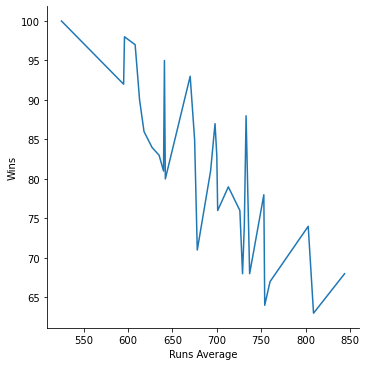

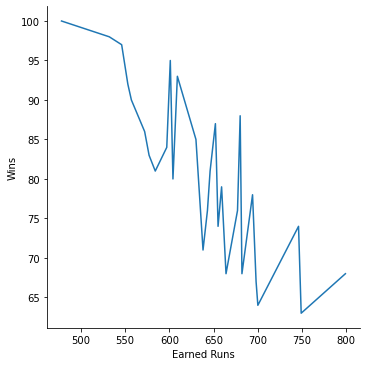

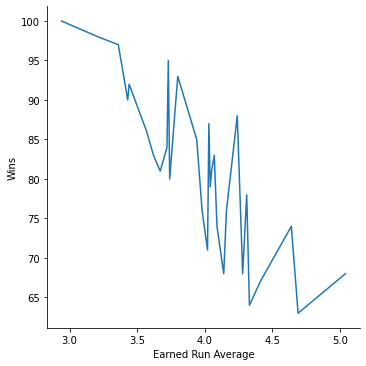

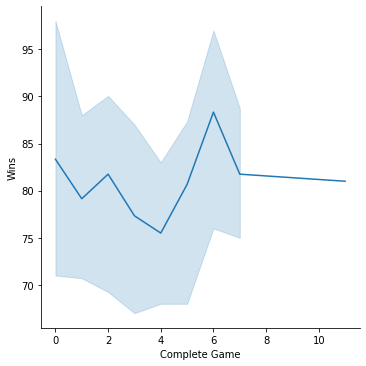

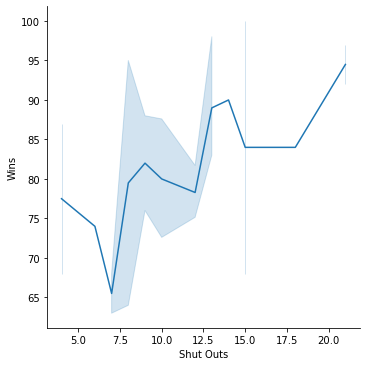

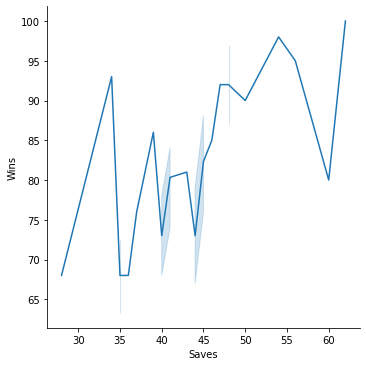

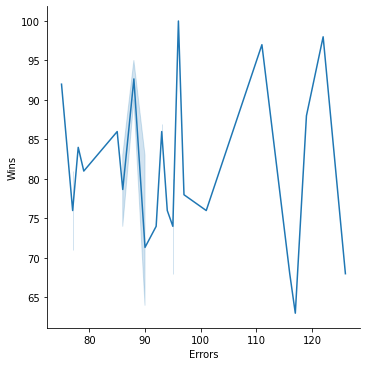

In [23]:
index = 0
features = df.drop("Wins", axis=1)
for col, value in features.items():
    sns.relplot(x=col, y="Wins", kind="line", data=df)
    index += 1
plt.show()

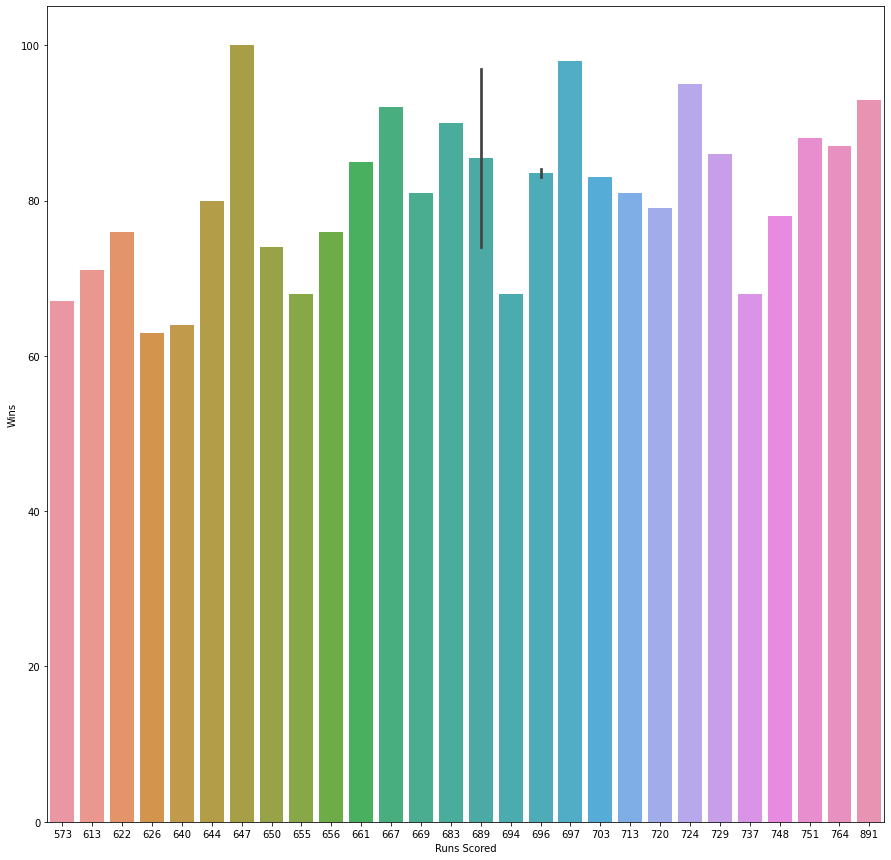

In [24]:
plt.figure(figsize=(15,15))
sns.barplot(x="Runs Scored", y="Wins", data=df)
plt.show()

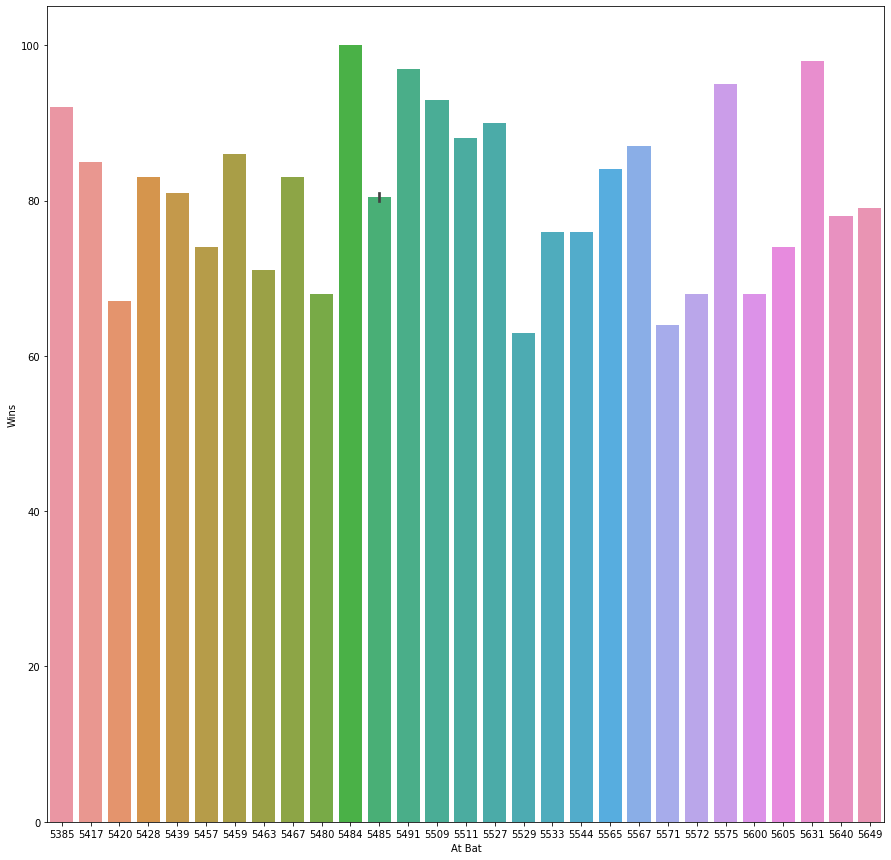

In [25]:
plt.figure(figsize=(15,15))
sns.barplot(x="At Bat", y="Wins", data=df)
plt.show()

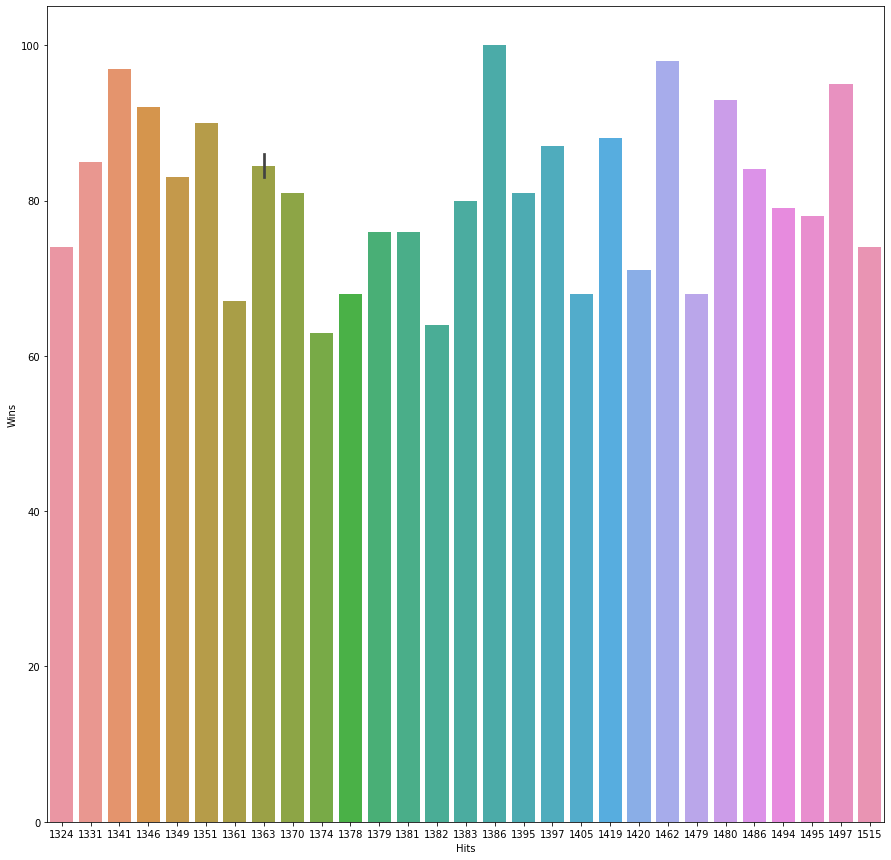

In [26]:
plt.figure(figsize=(15,15))
sns.barplot(x="Hits", y="Wins", data=df)
plt.show()

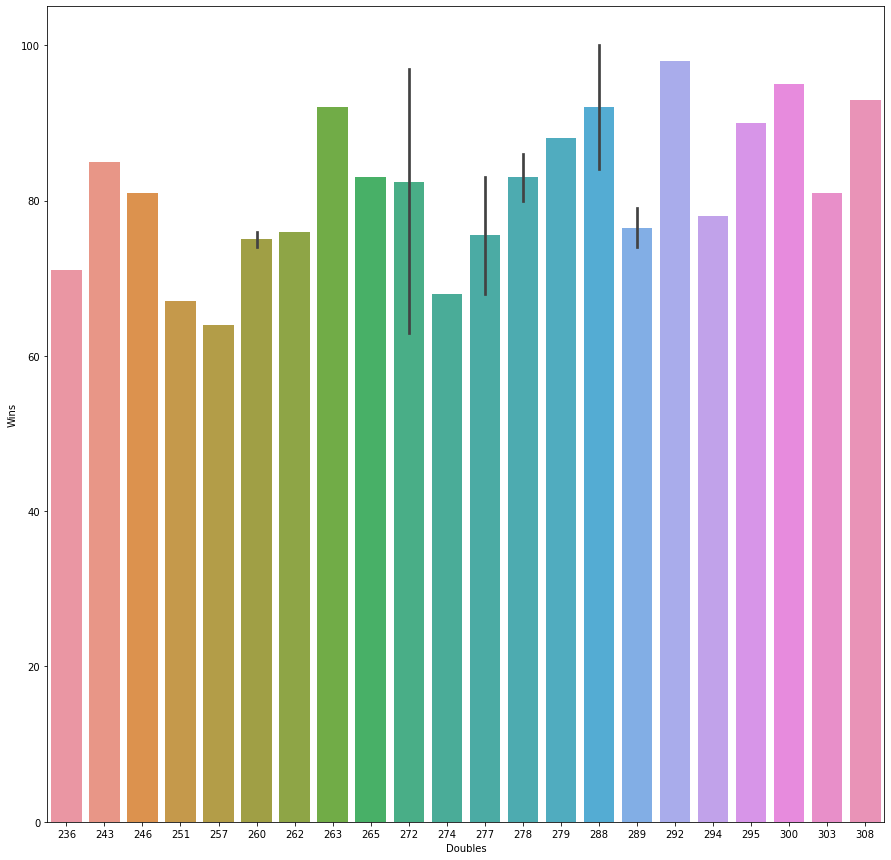

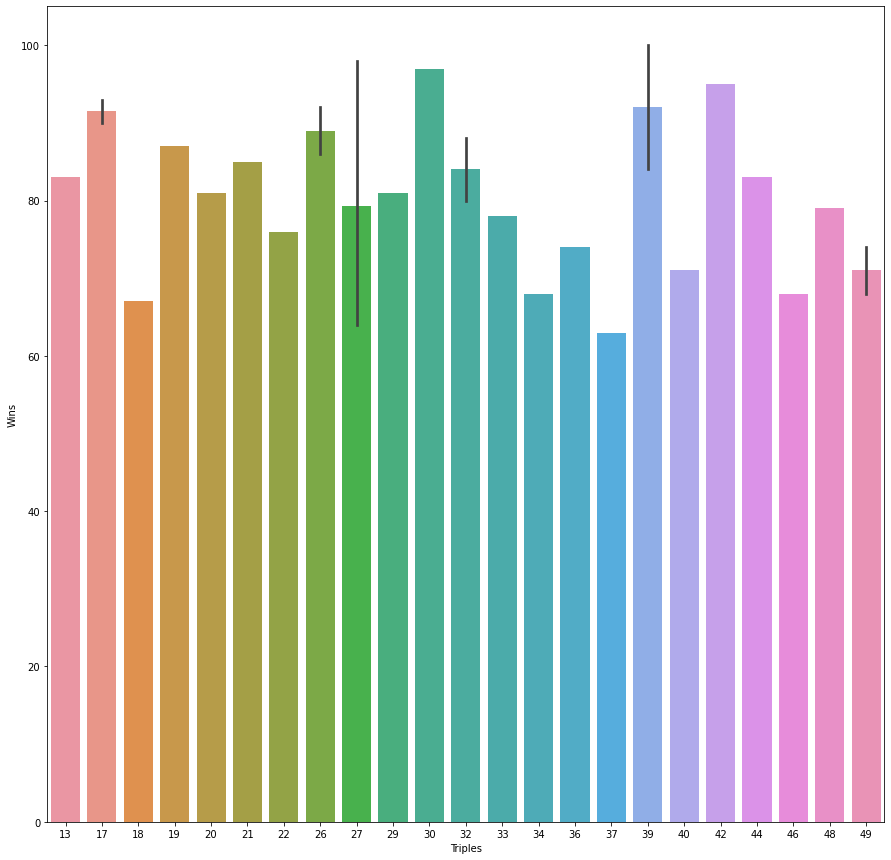

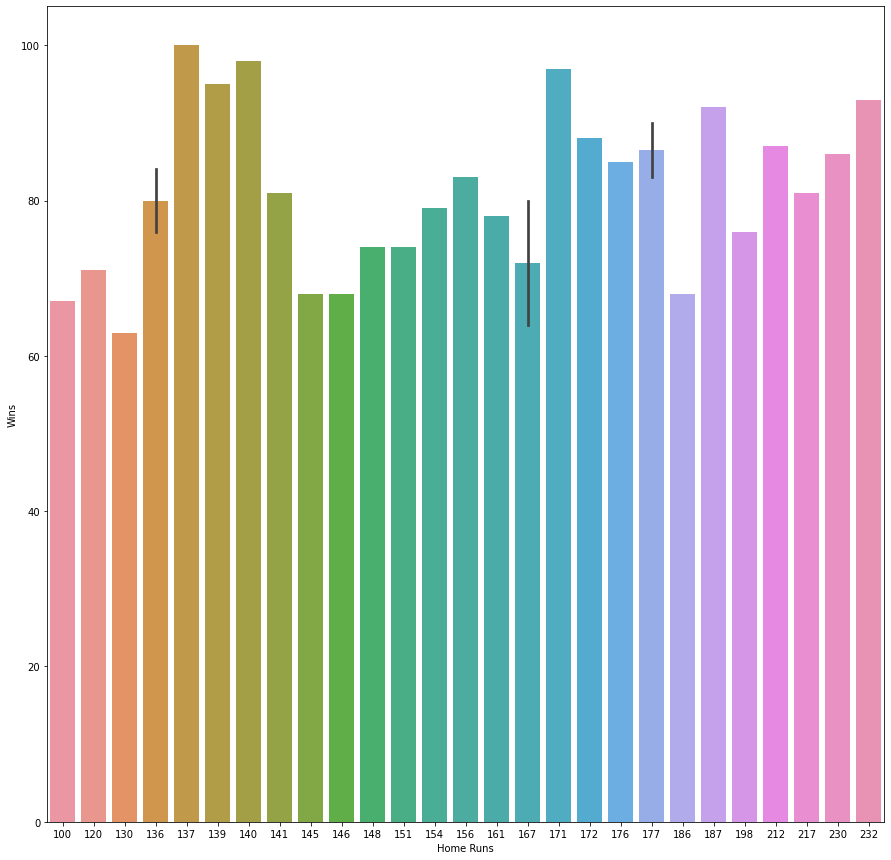

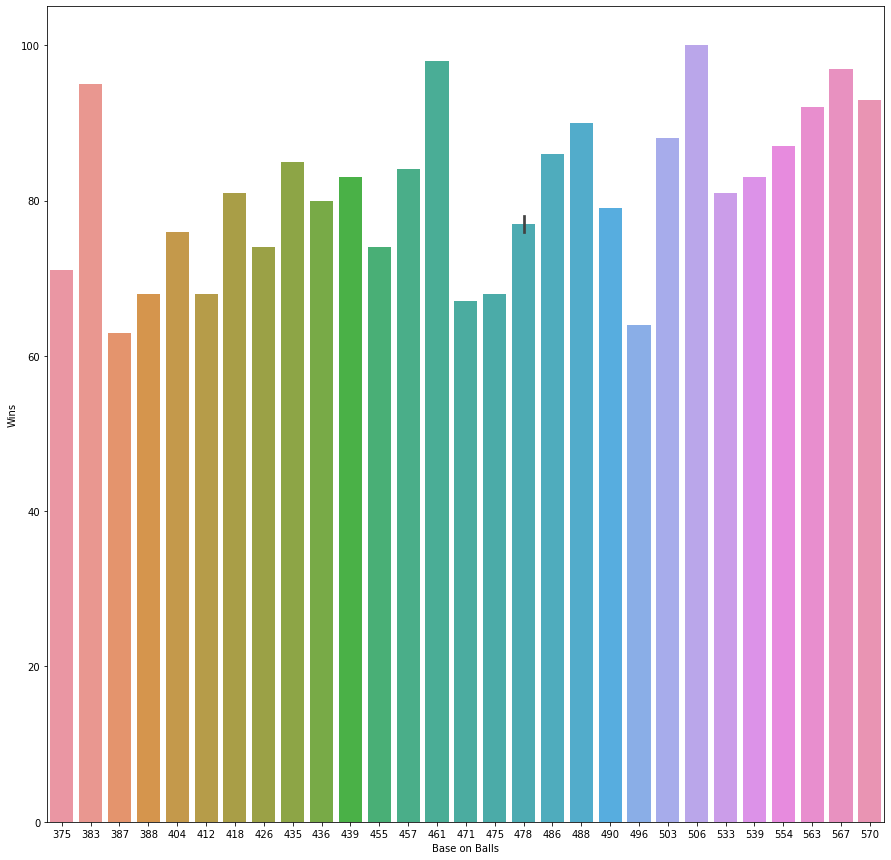

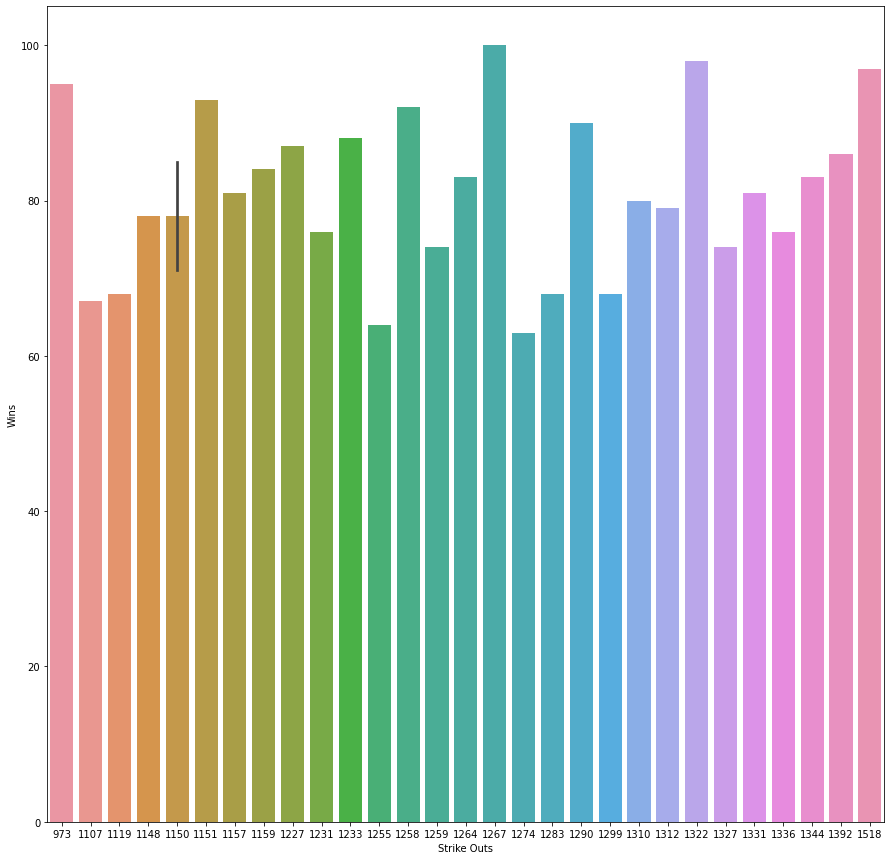

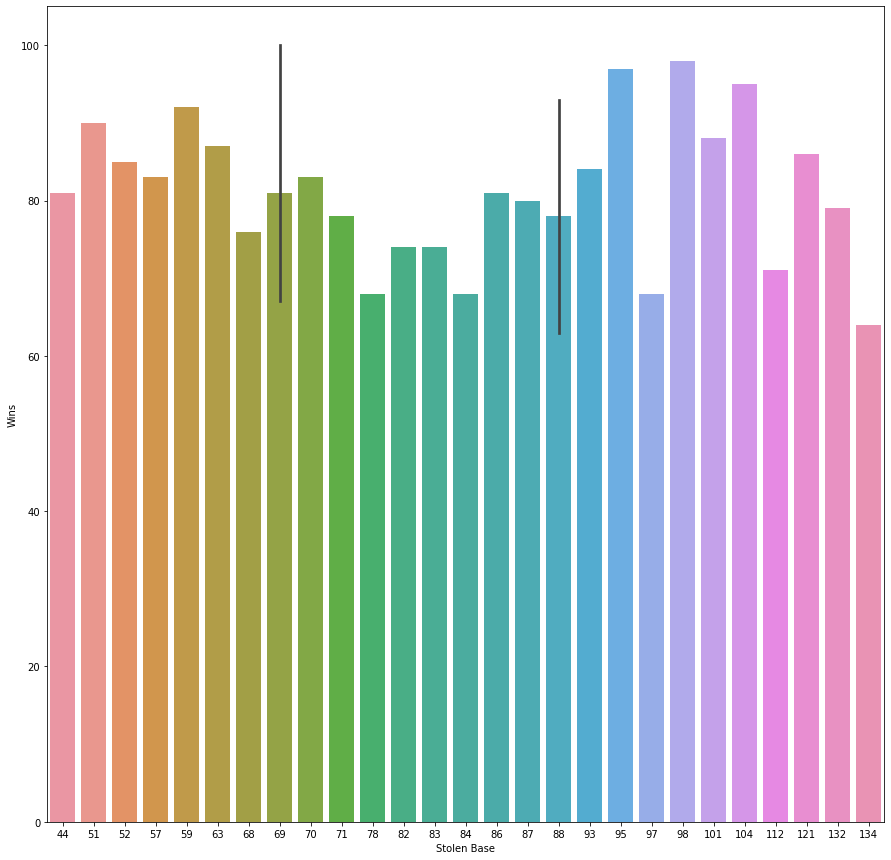

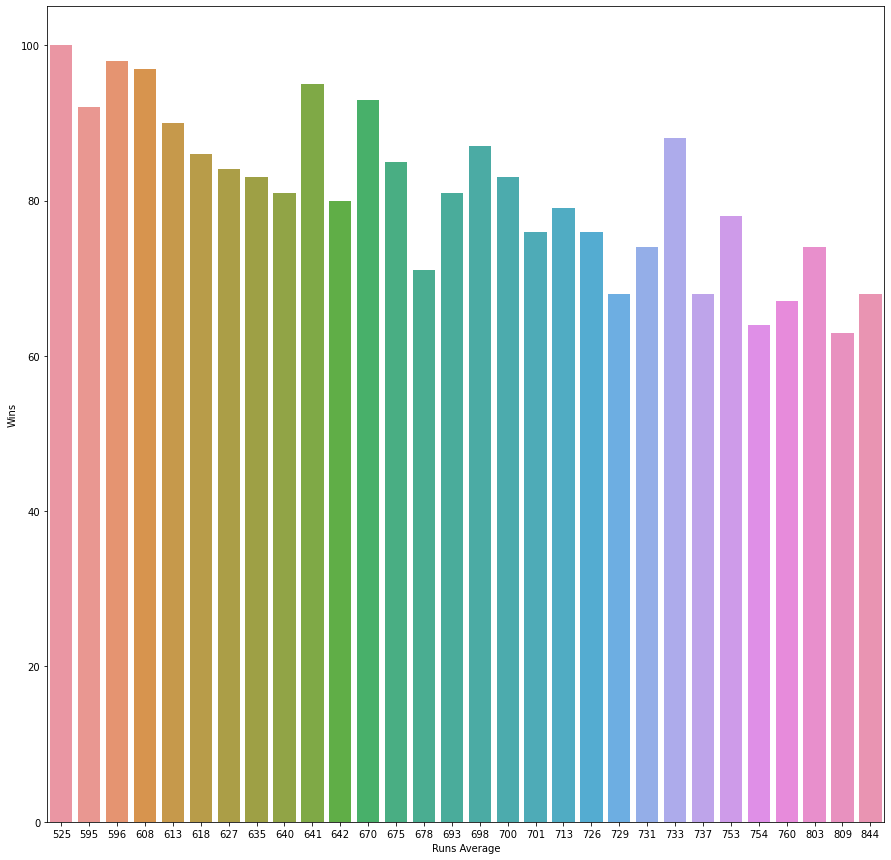

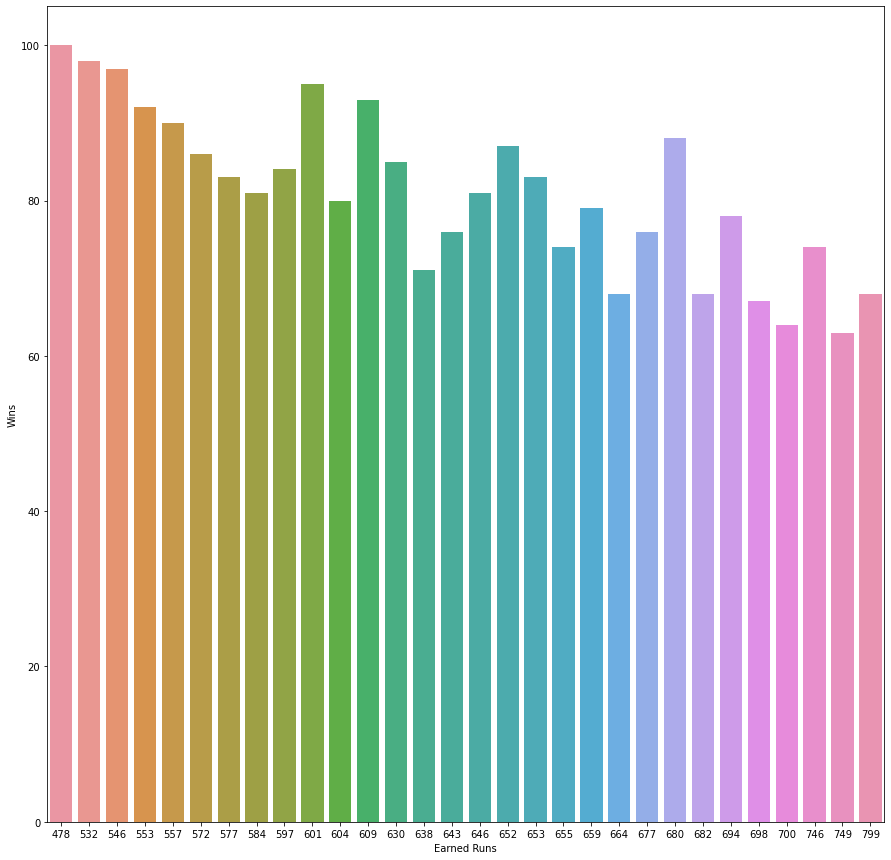

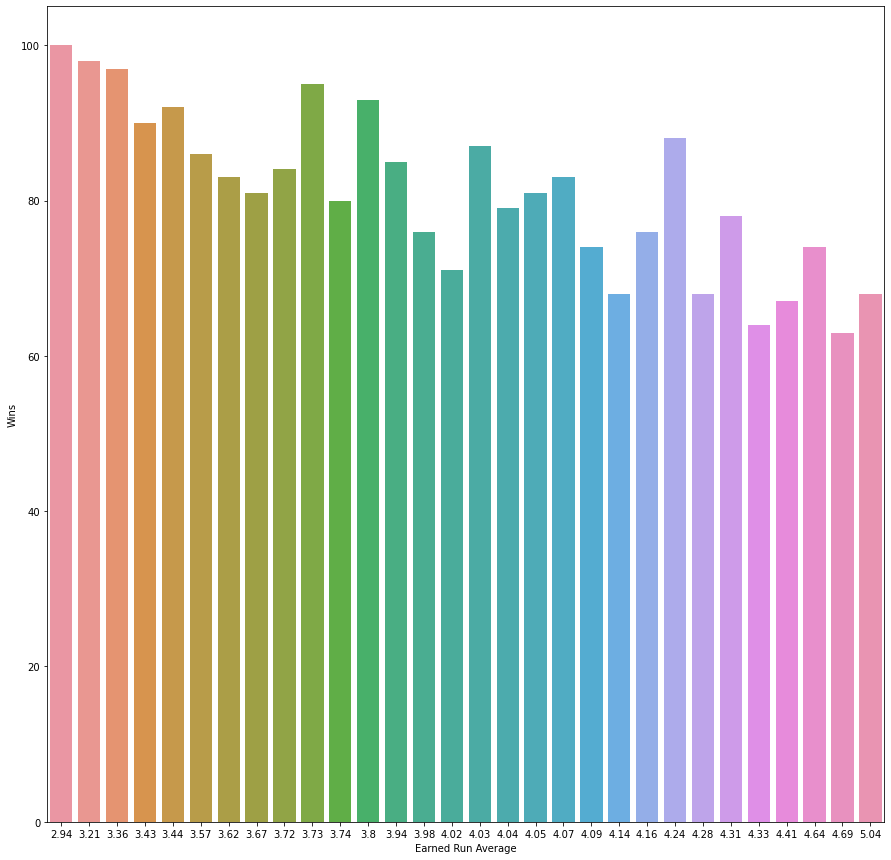

In [28]:
plt.figure(figsize=(15,15))
sns.barplot(x="Doubles", y="Wins", data=df)
plt.show()

plt.figure(figsize=(15,15))
sns.barplot(x="Triples", y="Wins", data=df)
plt.show()

plt.figure(figsize=(15,15))
sns.barplot(x="Home Runs", y="Wins", data=df)
plt.show()

plt.figure(figsize=(15,15))
sns.barplot(x="Base on Balls", y="Wins", data=df)
plt.show()

plt.figure(figsize=(15,15))
sns.barplot(x="Strike Outs", y="Wins", data=df)
plt.show()

plt.figure(figsize=(15,15))
sns.barplot(x="Stolen Base", y="Wins", data=df)
plt.show()

plt.figure(figsize=(15,15))
sns.barplot(x="Runs Average", y="Wins", data=df)
plt.show()

plt.figure(figsize=(15,15))
sns.barplot(x="Earned Runs", y="Wins", data=df)
plt.show()

plt.figure(figsize=(15,15))
sns.barplot(x="Earned Run Average", y="Wins", data=df)
plt.show()

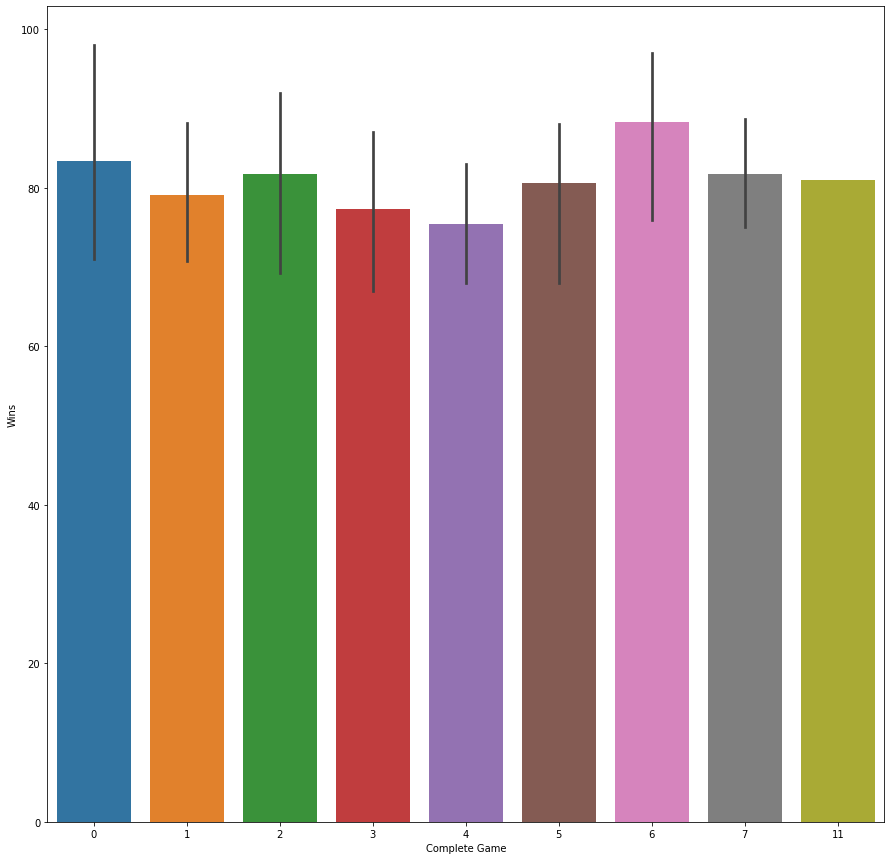

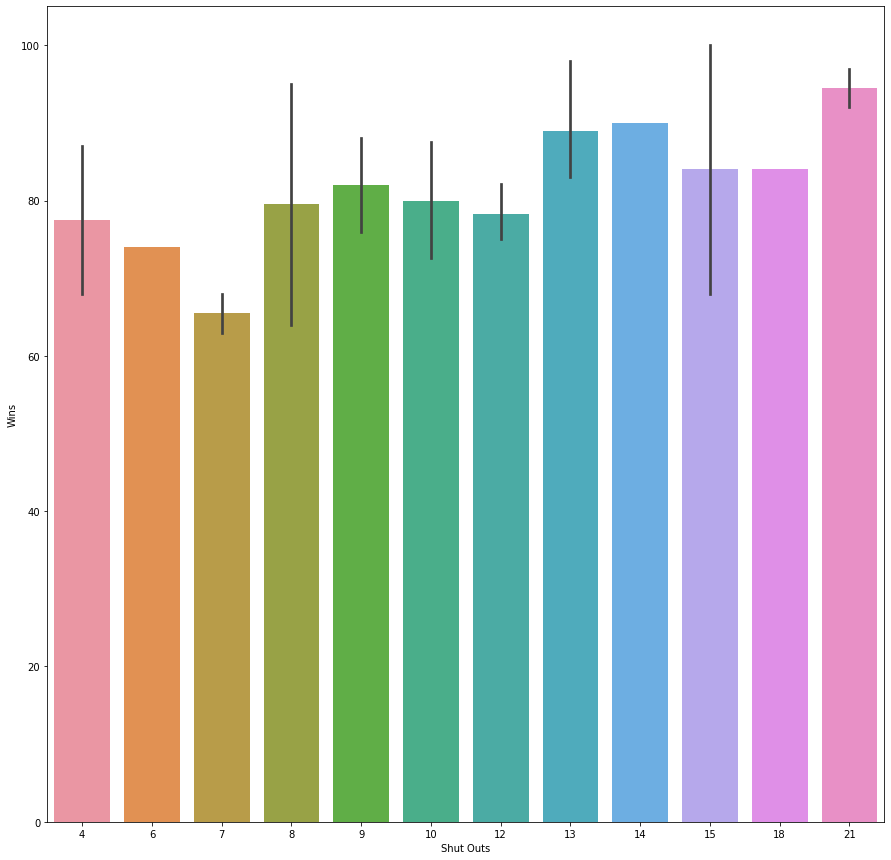

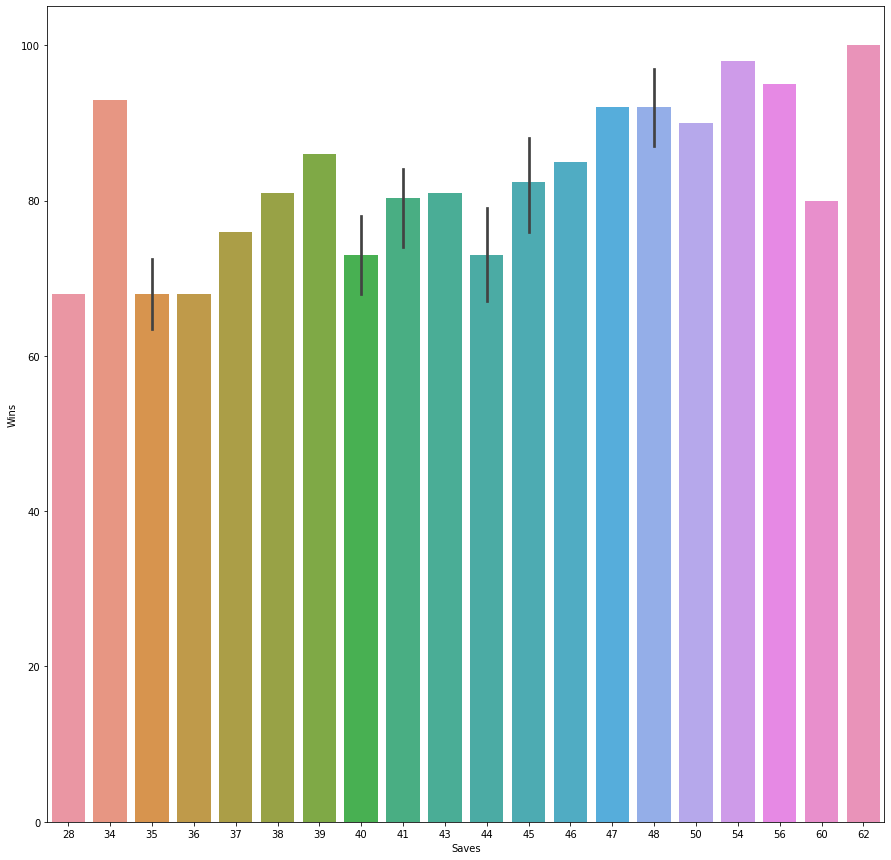

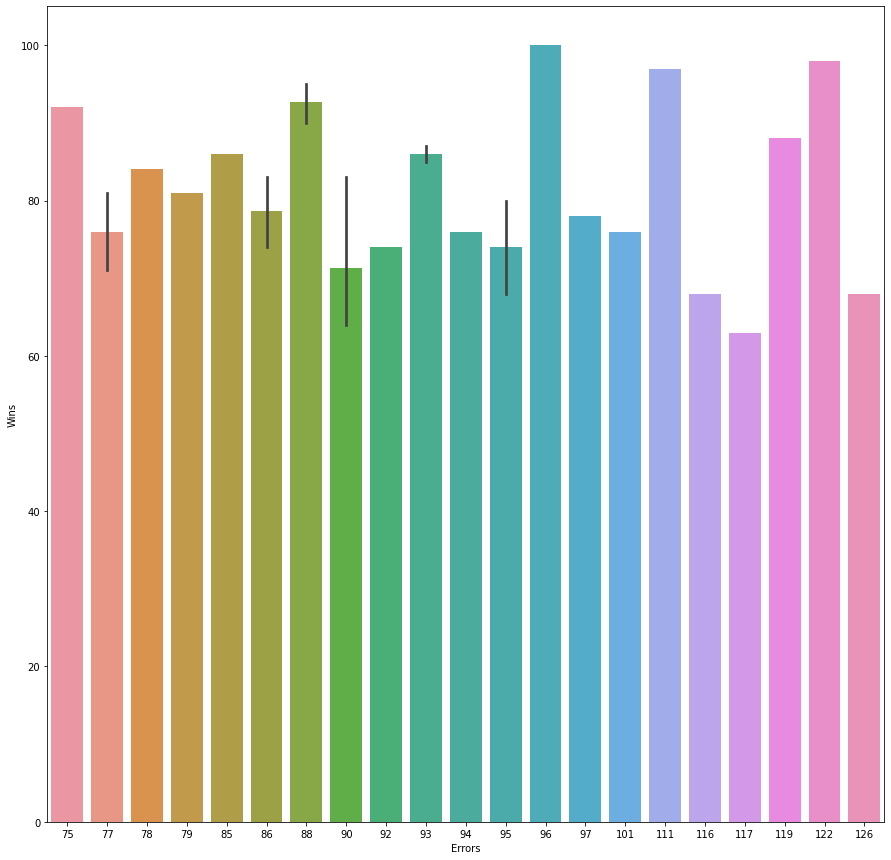

In [30]:
plt.figure(figsize=(15,15))
sns.barplot(x="Complete Game", y="Wins", data=df)
plt.show()

plt.figure(figsize=(15,15))
sns.barplot(x="Shut Outs", y="Wins", data=df)
plt.show()

plt.figure(figsize=(15,15))
sns.barplot(x="Saves", y="Wins", data=df)
plt.show()

plt.figure(figsize=(15,15))
sns.barplot(x="Errors", y="Wins", data=df)
plt.show()

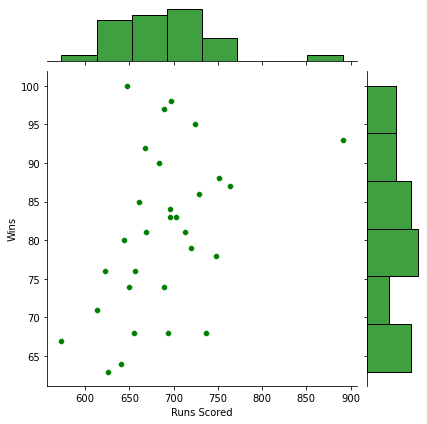

In [32]:
sns.jointplot(x="Runs Scored", y="Wins", data=df, color="green")


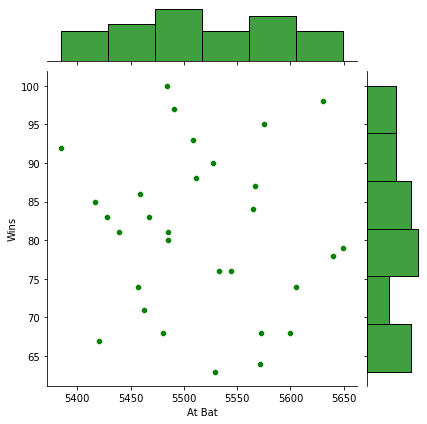

In [33]:
sns.jointplot(x="At Bat", y="Wins", data=df, color="green")


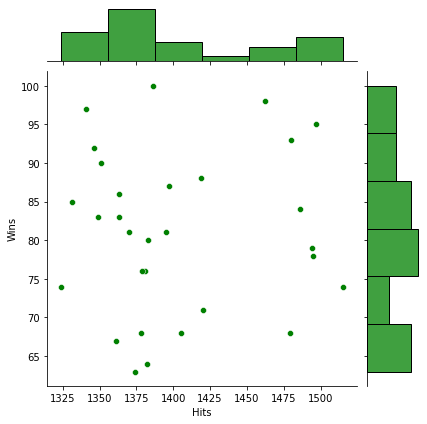

In [34]:
sns.jointplot(x="Hits", y="Wins", data=df, color="green")


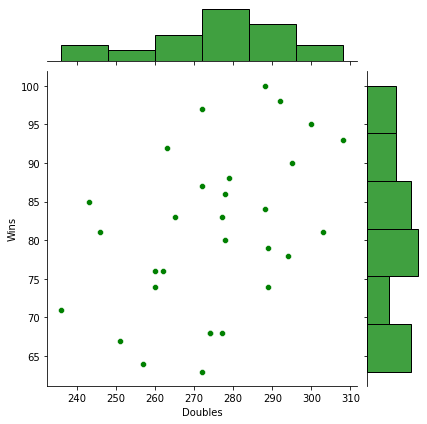

In [35]:
sns.jointplot(x="Doubles", y="Wins", data=df, color="green")


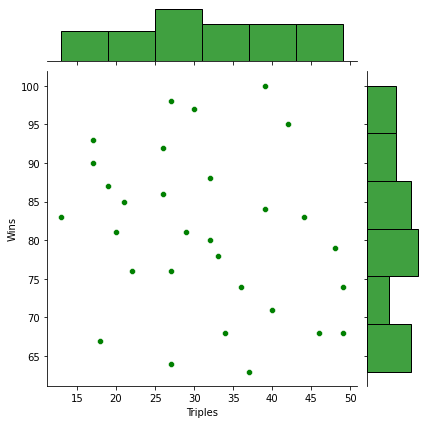

In [36]:
sns.jointplot(x="Triples", y="Wins", data=df, color="green")


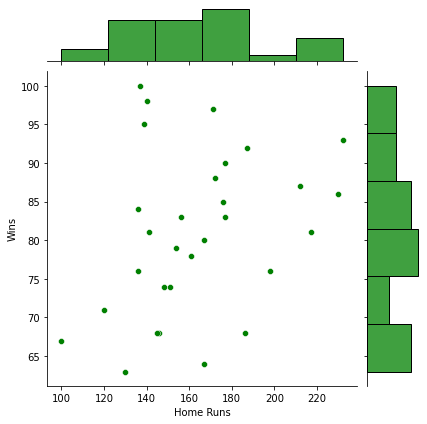

In [38]:
sns.jointplot(x="Home Runs", y="Wins", data=df, color="green")


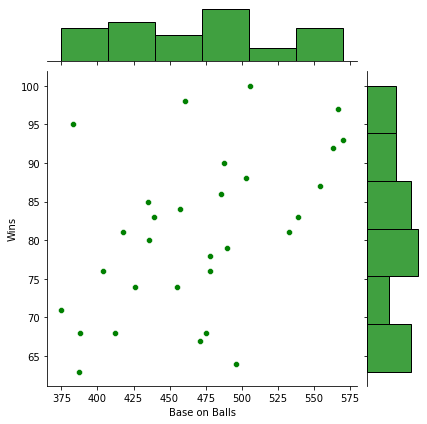

In [39]:
sns.jointplot(x="Base on Balls", y="Wins", data=df, color="green")


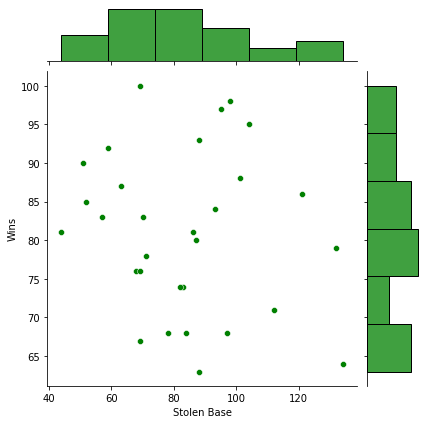

In [40]:
sns.jointplot(x="Stolen Base", y="Wins", data=df, color="green")


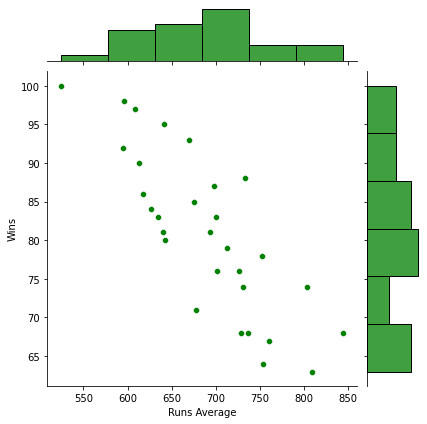

In [42]:
sns.jointplot(x="Runs Average", y="Wins", data=df, color="green")


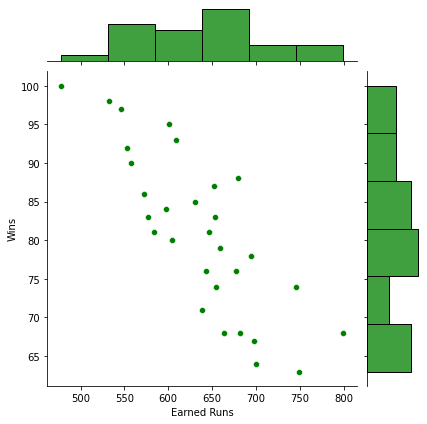

In [43]:
sns.jointplot(x="Earned Runs", y="Wins", data=df, color="green")


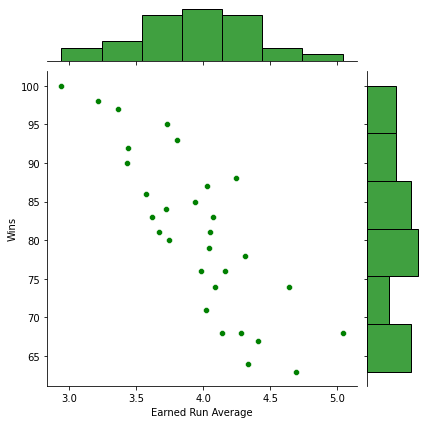

In [44]:
sns.jointplot(x="Earned Run Average", y="Wins", data=df, color="green")


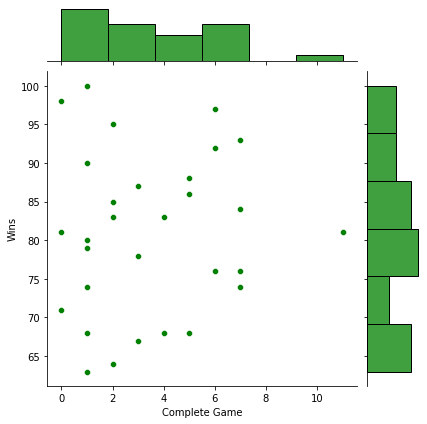

In [45]:
sns.jointplot(x="Complete Game", y="Wins", data=df, color="green")


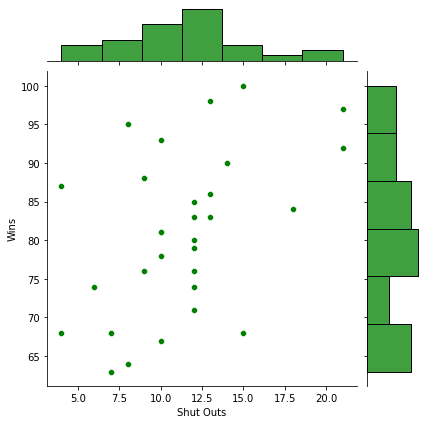

In [46]:
sns.jointplot(x="Shut Outs", y="Wins", data=df, color="green")


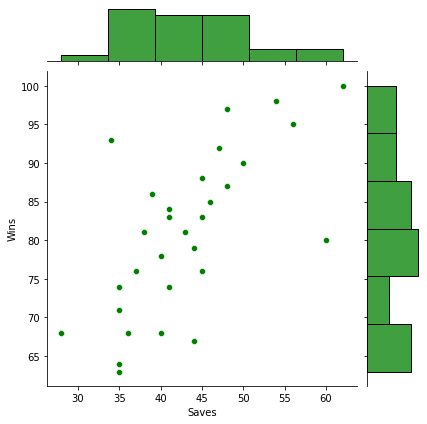

In [47]:
sns.jointplot(x="Saves", y="Wins", data=df, color="green")


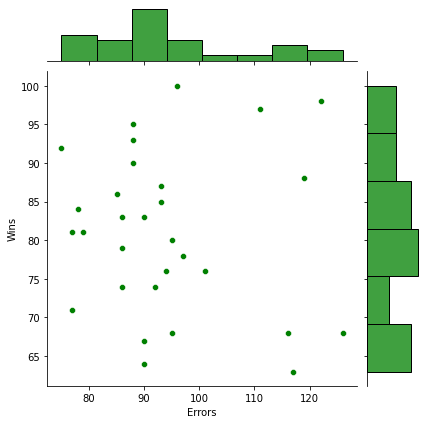

In [48]:
sns.jointplot(x="Errors", y="Wins", data=df, color="green")


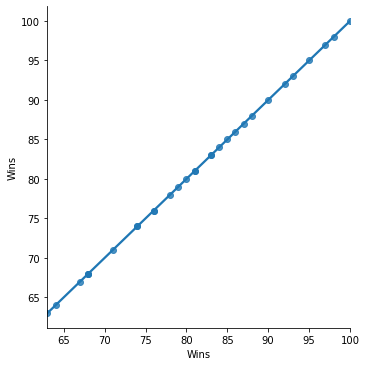

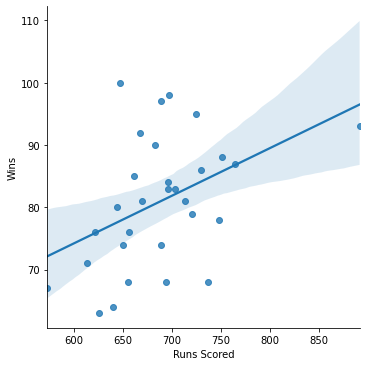

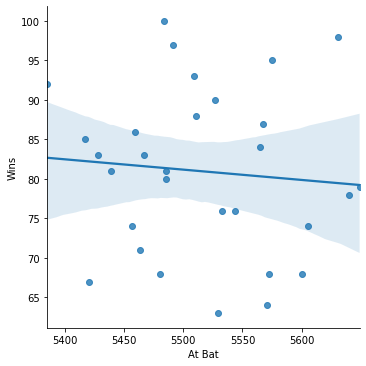

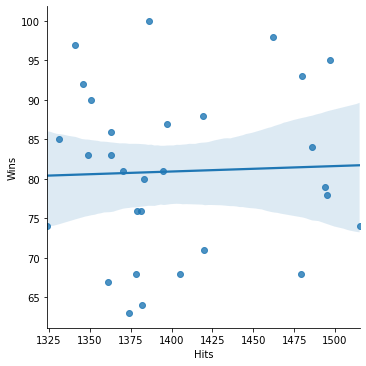

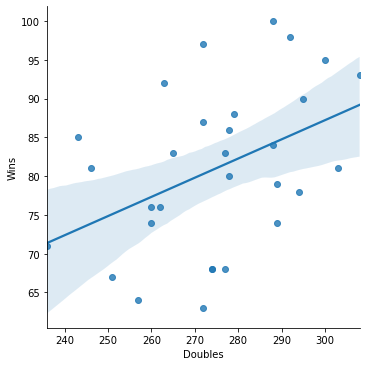

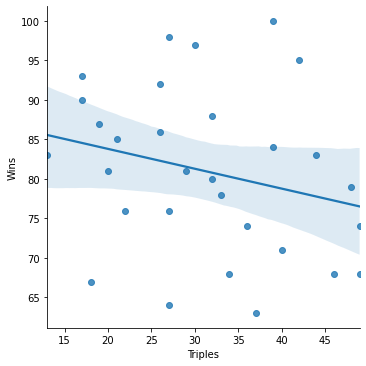

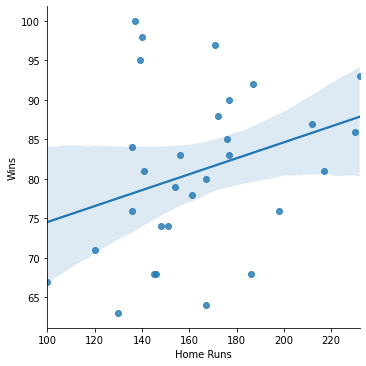

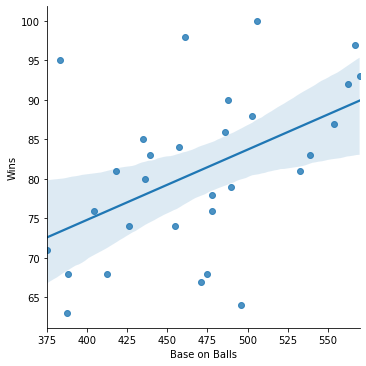

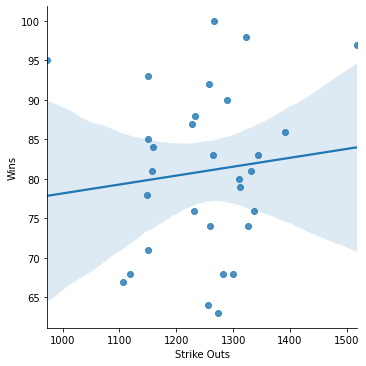

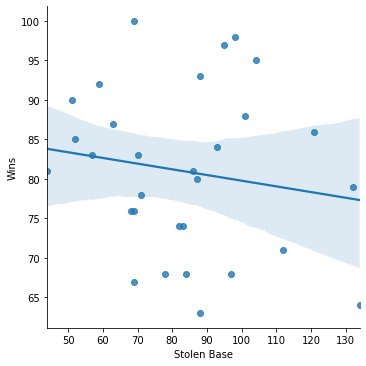

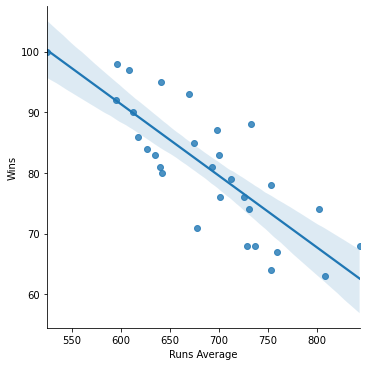

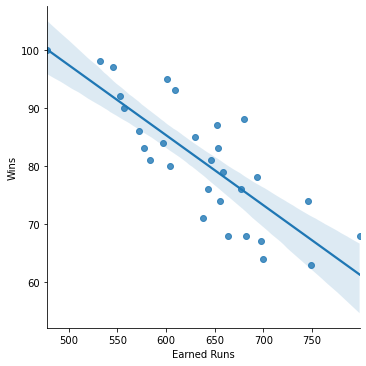

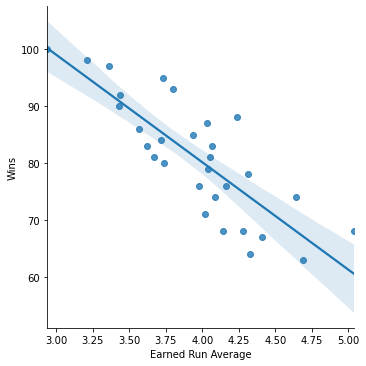

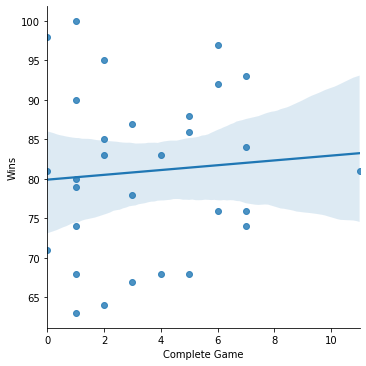

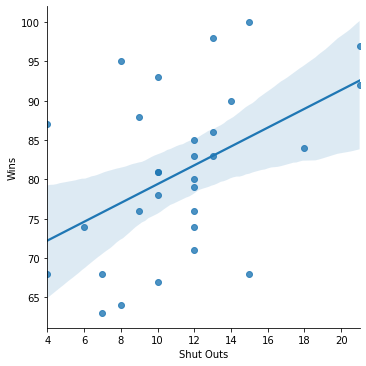

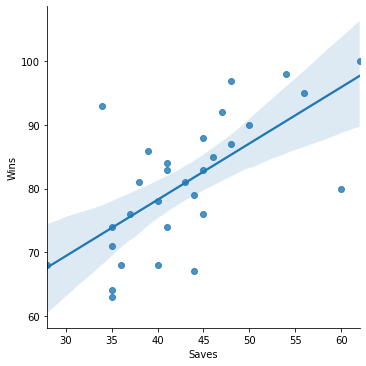

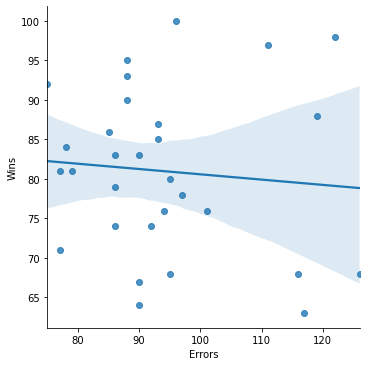

In [49]:
for i in df:
    sns.lmplot(x = i , y ='Wins' , data = df)

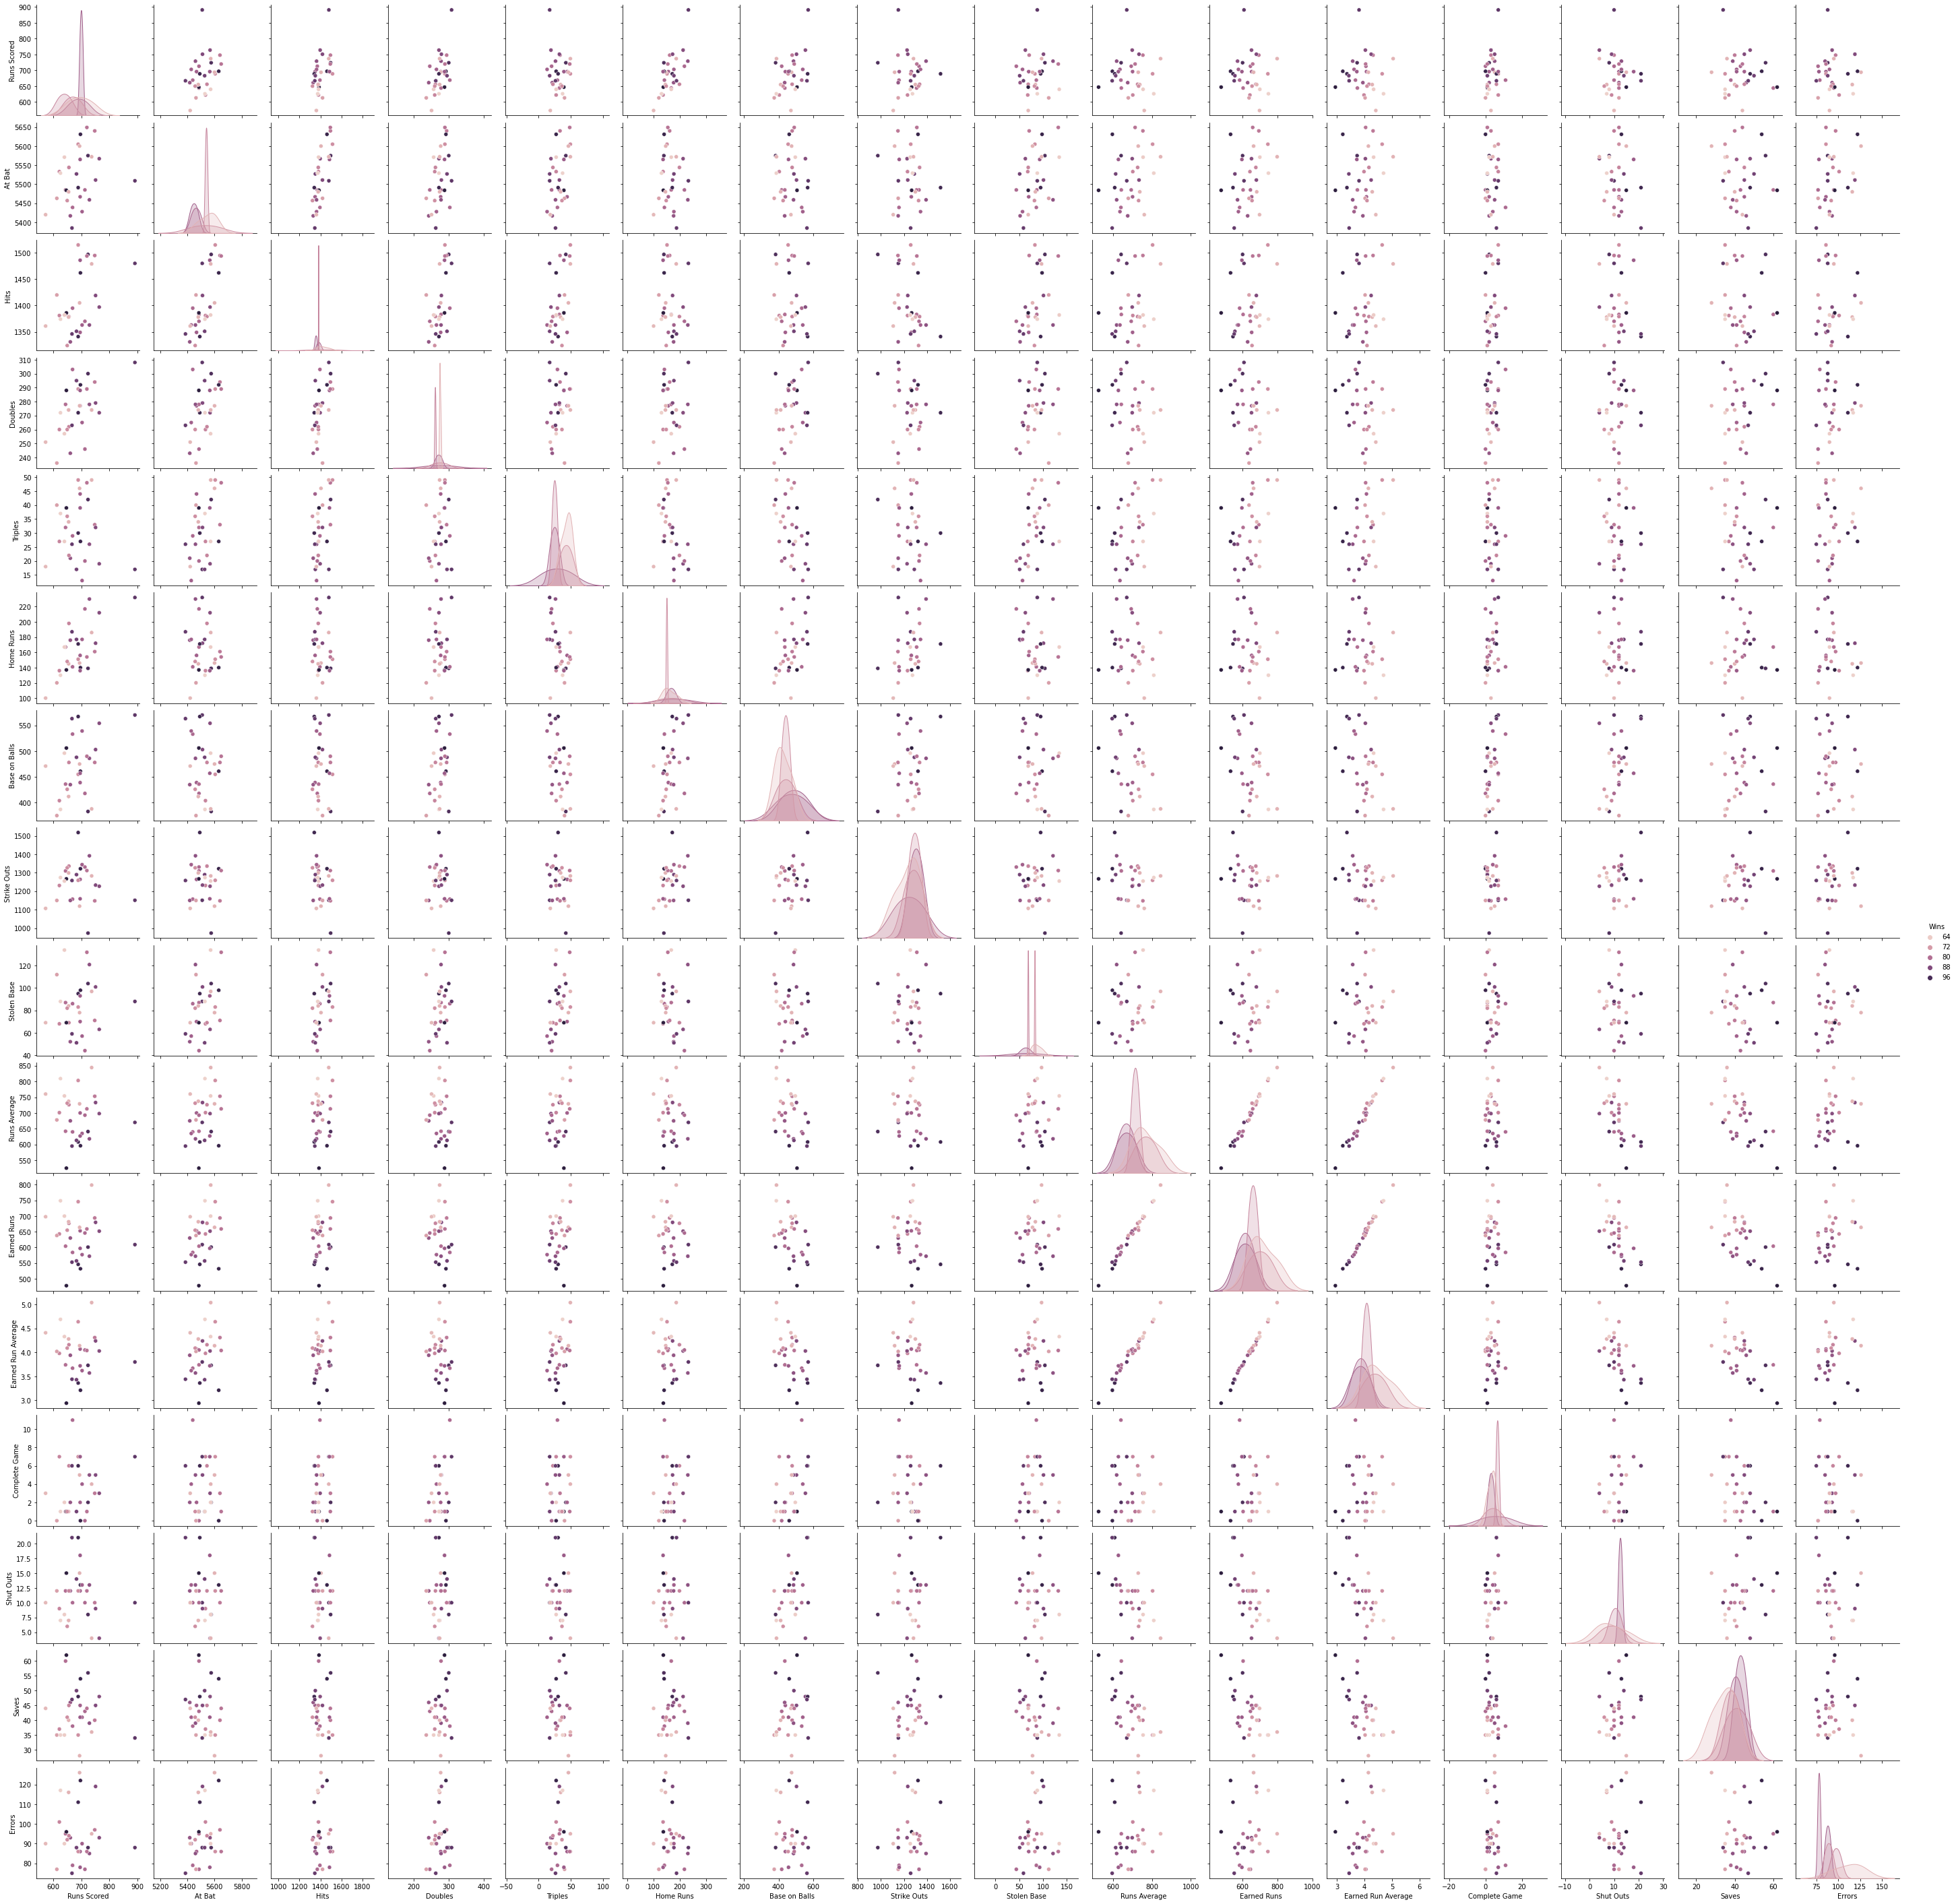

In [50]:
sns.pairplot(df, hue="Wins")


Correlation using a Heatmap
Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.


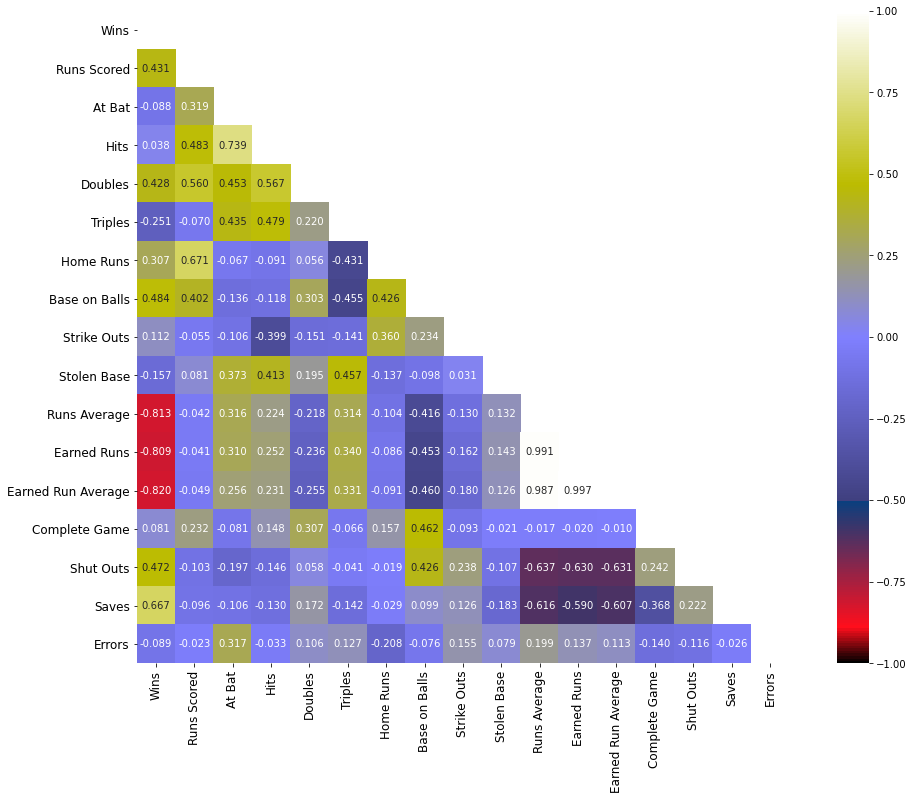

In [51]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In the above heatmap we see that our label "Wins" column is showing negatively correlated with feature columns "Runs Average", "Earned Runs" and "Earned Run Average". Also there is visible multi colinearity between the feature columns "Earned Runs", "Earned Run Average" and "Runs Average" data points. We may need to drop highly correlated columns to avoid this issue or I may try to make use of PCA to reduce the multi collearnig concern ahead before the model building phase.



In [52]:
df = df.drop(["Earned Runs", "Earned Run Average"], axis=1)


# Outlier removal using Z Score


In [53]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (30, 15)
Shape of the dataframe after removing outliers:  (29, 15)
Percentage of data loss post outlier removal:  3.3333333333333335


Box Plot


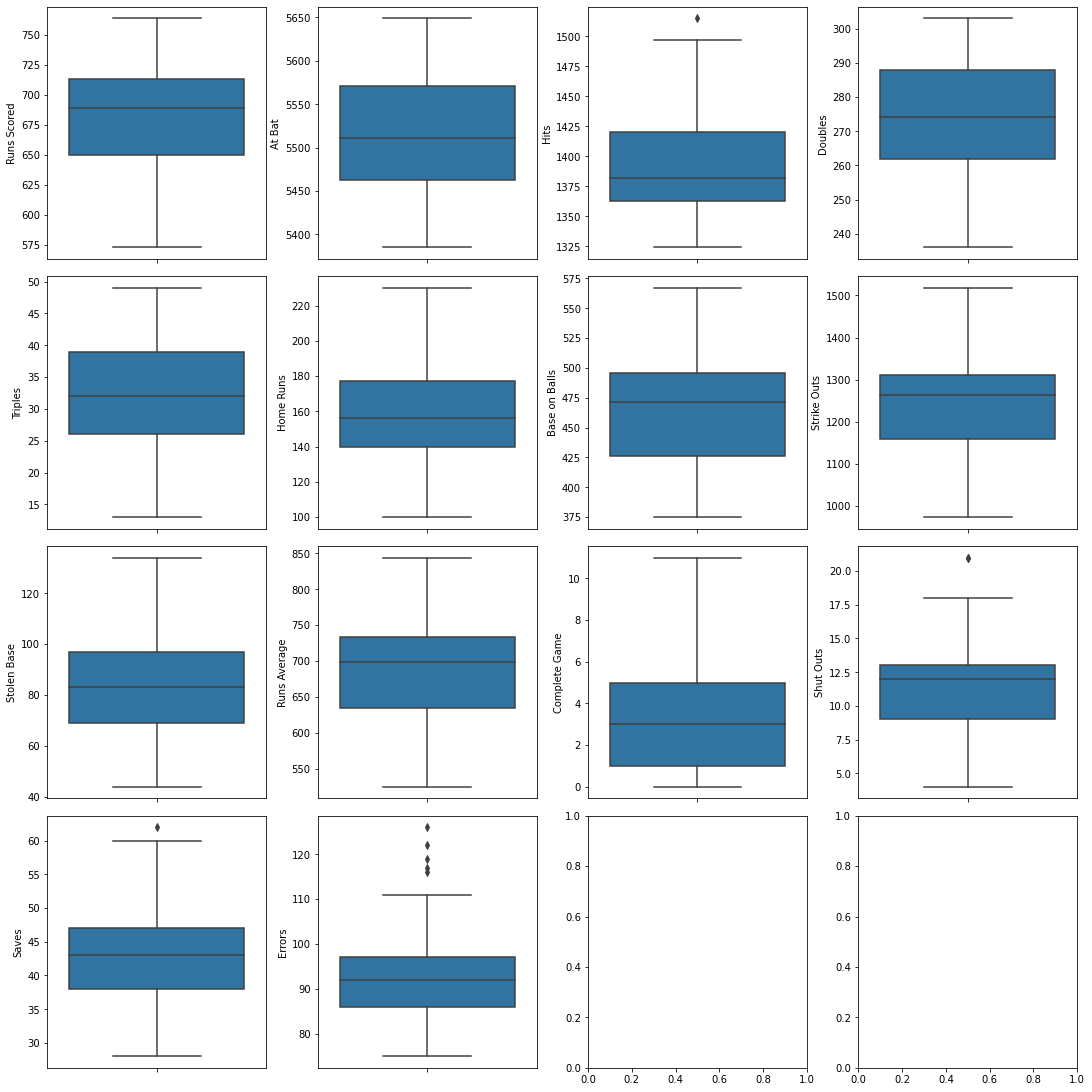

In [55]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="tab10")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

Distribution plot

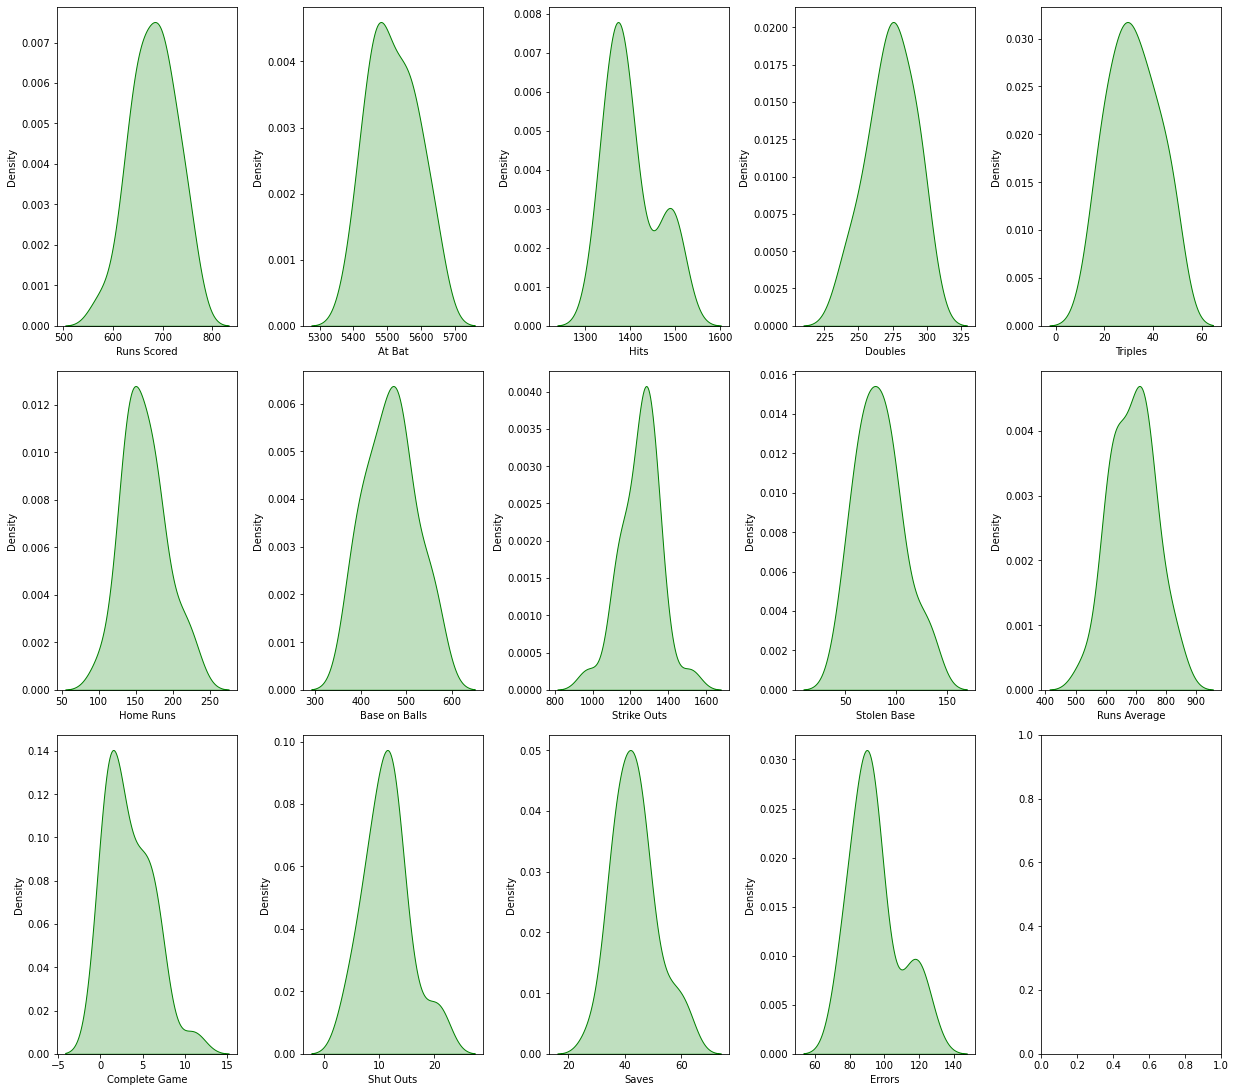

In [56]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(17,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label


In [57]:
X = df.drop('Wins', axis=1)
Y = df['Wins']

 #  Feature Scaling


In [58]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head(10)

,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Complete Game,Shut Outs,Saves,Errors
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.501486,-0.813262,1.643157,-0.471091
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,-0.501486,0.159299,0.211006,-0.614898
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,2.854612,-0.326982,-0.700362,-1.118222
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,1.363013,-0.570122,-0.830557,0.463653
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.363013,0.159299,-1.090948,-0.614898
5,1.856900,0.716535,-0.070480,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,-0.128586,-1.785822,0.601593,-0.111574
6,0.712585,-0.447345,-0.558853,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,-1.247285,-0.326982,-0.049384,-1.262029
7,-0.835605,-0.447345,-0.323710,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.874386,0.159299,2.163939,0.032233
8,1.497899,1.752672,1.702131,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,-0.128586,-0.326982,-0.439971,0.176039
9,1.565212,-0.078310,0.327453,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.617213,-0.570122,0.211006,1.757915


# Principal component analysis (PCA)


In [59]:
pca = PCA(n_components=14, svd_solver="full")
X = pd.DataFrame(pca.fit_transform(X), columns=X.columns)
X.head(10)

,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Complete Game,Shut Outs,Saves,Errors
0,-2.957996,-0.953253,2.246316,-1.216994,-2.357314,0.016125,0.626783,0.394846,0.882534,0.554004,-0.258275,-0.218896,-0.176119,0.192275
1,0.240394,0.417411,0.313526,-0.266703,-0.294763,0.504699,-0.962596,1.240400,0.256176,-0.827710,0.332404,-0.199270,-0.010978,0.486047
2,0.474141,-1.106621,0.911147,3.099281,-0.796596,-0.762581,1.542021,1.355597,-0.235204,0.159777,0.549155,0.082016,0.205976,-0.116133
3,-0.109473,1.848198,0.163538,1.093046,0.300077,-1.019805,-0.127039,0.024300,-0.562258,1.324900,-0.151055,-0.102882,0.737932,0.222658
4,-2.909976,-0.777732,-0.319362,1.853279,-0.148994,0.213535,-1.046595,0.188747,-1.268692,-0.264274,-0.364419,0.118457,-0.147223,-0.268420
5,0.667623,-1.404411,-2.424945,-0.966726,-1.725726,-1.119576,1.016351,-0.453021,0.101003,-0.685705,-0.280422,-0.149604,0.698599,-0.025234
6,1.947763,0.997051,-2.042951,-1.258751,-1.728523,0.792559,-1.306637,-0.455940,-0.201846,0.328548,0.206196,0.220391,0.094941,-0.003327
7,0.939941,-0.062020,1.197914,-1.850466,0.162508,0.548143,0.150741,0.700940,-0.481820,0.298089,-0.687803,-0.378809,-0.342151,-0.146316
8,-2.383972,-1.433303,-0.623188,-0.034015,-1.169926,-1.165087,-0.411894,-0.856657,-0.244877,-0.377093,0.350590,0.165218,-0.282090,0.028534
9,-0.883912,-1.117449,-1.155980,-0.166050,0.614701,-1.047468,0.786800,0.361866,1.213722,-0.148495,-0.822724,0.475524,-0.306328,0.150268



# Power Transformation


In [60]:
p_transform = PowerTransformer(method = 'yeo-johnson')
X = pd.DataFrame(p_transform.fit_transform(X), columns=X.columns)
X.head(10)

,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Complete Game,Shut Outs,Saves,Errors
0,-1.531314,-0.498970,1.648944,-1.012066,-2.313643,0.160763,0.858484,0.615354,1.330458,1.040373,-0.514105,-0.560659,-0.467027,0.926858
1,0.107095,0.491777,0.264410,-0.152456,-0.222672,0.618698,-1.355468,1.627497,0.506216,-1.732195,0.707081,-0.507797,0.121365,2.093866
2,0.231348,-0.637813,0.701913,2.267201,-0.705892,-0.741631,1.791532,1.755747,-0.285770,0.395032,1.130860,0.236013,0.754554,-0.513110
3,-0.077322,1.155694,0.152658,0.908262,0.317725,-1.081383,-0.067982,0.116307,-0.903286,2.107384,-0.284258,-0.249929,1.884386,1.055454
4,-1.507223,-0.346199,-0.214158,1.442298,-0.086620,0.354539,-1.497998,0.343404,-2.446157,-0.425055,-0.744902,0.330416,-0.356914,-1.324429
5,0.334721,-0.920914,-1.898773,-0.777902,-1.647266,-1.218018,1.274056,-0.601532,0.273842,-1.381634,-0.562001,-0.374556,1.814975,-0.060628
6,1.027540,0.787104,-1.585944,-1.051603,-1.650175,0.860395,-1.952420,-0.606167,-0.226670,0.682387,0.455062,0.592304,0.447967,0.044761
7,0.480910,0.201045,0.908332,-1.624805,0.196177,0.656288,0.297876,0.998391,-0.745228,0.631872,-1.465975,-0.995567,-1.159171,-0.668680
8,-1.242640,-0.949294,-0.449948,0.043601,-1.077768,-1.281211,-0.478003,-1.267010,-0.303047,-0.668205,0.743058,0.450942,-0.897050,0.195479
9,-0.479206,-0.647799,-0.870502,-0.066799,0.589530,-1.119003,1.033087,0.572677,1.713964,-0.186051,-1.774019,1.235321,-1.001225,0.745612


# Variance Inflation Factor(VIF)


In [61]:
vif_data = pd.DataFrame()
vif_data["Features List"]=X.columns
vif_data["VIF Value"]=[variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

,Features List,VIF Value
0,Runs Scored,1.006200
1,At Bat,1.017150
2,Hits,1.005998
3,Doubles,1.007102
4,Triples,1.005601
5,Home Runs,1.011452
6,Base on Balls,1.013386
7,Strike Outs,1.007557
8,Stolen Base,1.010934
9,Runs Average,1.002451


If a VIF is above 10 it indicates high correlation and is cause for concern. Right now we have almost all the feature columns within the range of intended VIF value. This definitely gives us a green signal on creating our machine learning model.



In [62]:
X.skew()


Runs Scored      0.019135
At Bat           0.138663
Hits             0.002219
Doubles          0.010464
Triples          0.012446
Home Runs        0.073433
Base on Balls    0.004156
Strike Outs      0.028031
Stolen Base     -0.068430
Runs Average     0.049740
Complete Game    0.061566
Shut Outs        0.019880
Saves            0.046013
Errors           0.003803
dtype: float64

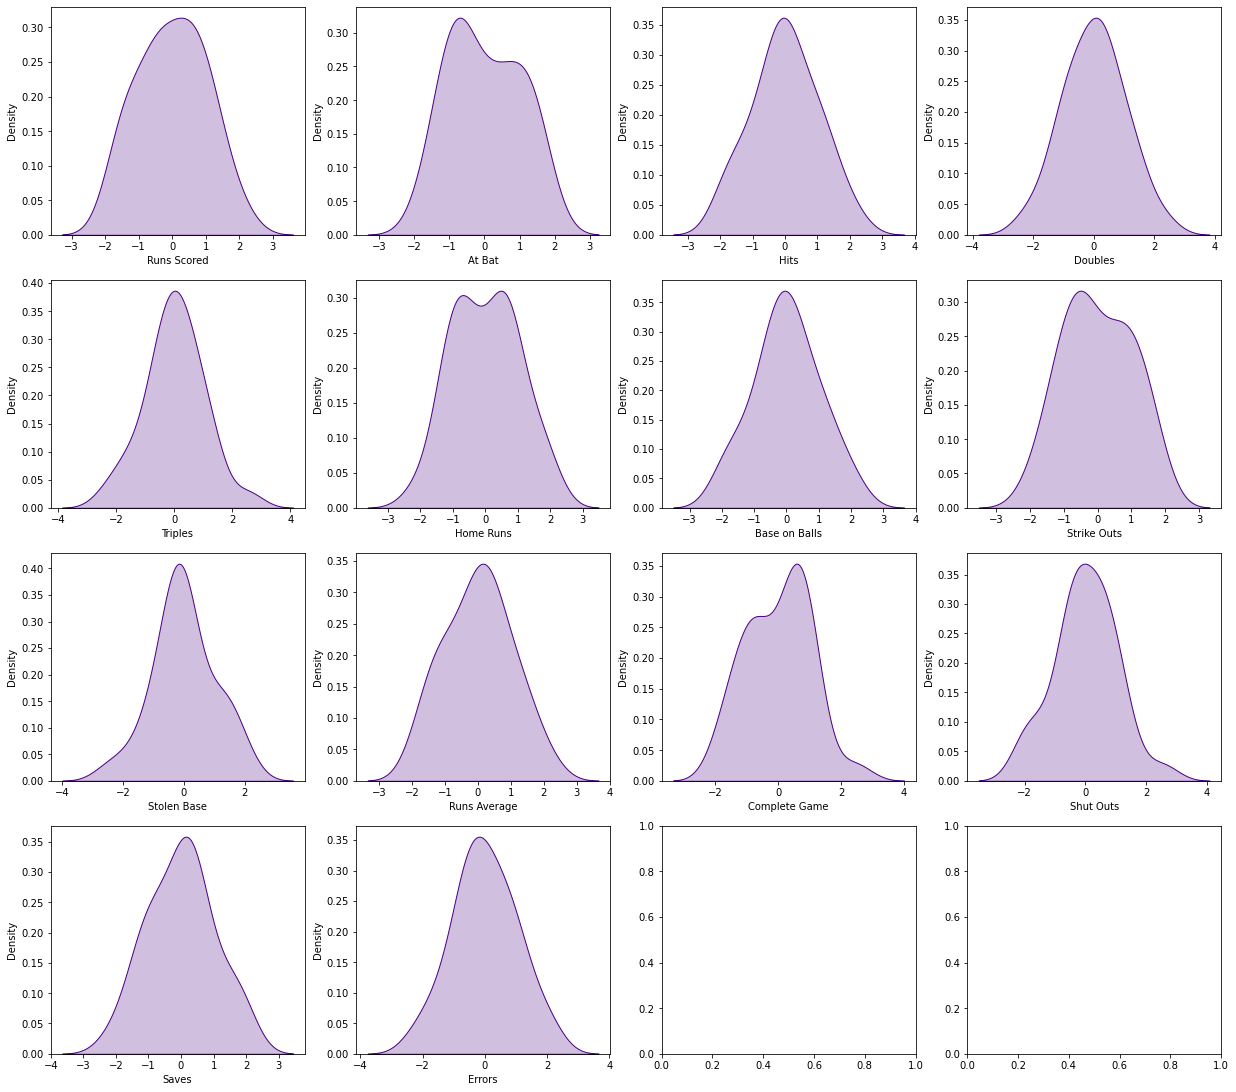

In [63]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(17,15))
index = 0
ax = ax.flatten()
for col, value in X.items():
    sns.distplot(value, ax=ax[index], hist=False, color="indigo", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

# Finding best random state for building Regression Models


In [64]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.9354003736325327 on Random State 708


# Creating the training and testing data sets


In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=708)


# Machine Learning Model for Regression with Evaluation Metrics


In [67]:
#Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=708)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [68]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 3.148814583020766
R2 Score is: 93.54003736325328
Cross Validation Score: 23.06111660106318
R2 Score - Cross Validation Score is 70.4789207621901


In [69]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)


RMSE Score is: 3.261707698114895
R2 Score is: 93.06852107392561
Cross Validation Score: 24.99930059965692
R2 Score - Cross Validation Score is 68.06922047426869


In [70]:
# Lasso Regression

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE Score is: 3.596731549865027
R2 Score is: 91.57146918584093
Cross Validation Score: 25.912111466961008
R2 Score - Cross Validation Score is 65.65935771887992


In [71]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 12.416554603529034
R2 Score is: -0.4472463222513934
Cross Validation Score: -44.952270380446656
R2 Score - Cross Validation Score is 44.50502405819526


In [72]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 11.241663577958558
R2 Score is: 17.662628524890568
Cross Validation Score: -173.3181896424058
R2 Score - Cross Validation Score is 190.98081816729638


In [73]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 11.25900923182396
R2 Score is: 17.4083427825815
Cross Validation Score: -3.8916839256632656
R2 Score - Cross Validation Score is 21.300026708244765


In [74]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 10.79890978000847
R2 Score is: 24.02063569222431
Cross Validation Score: 0.18914021374475398
R2 Score - Cross Validation Score is 23.831495478479557


In [75]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 12.986979327271712
R2 Score is: -9.888470436800368
Cross Validation Score: -95.45031209117403
R2 Score - Cross Validation Score is 85.56184165437367


In [76]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 8.479806486916761
R2 Score is: 53.150203038220944
Cross Validation Score: -28.707085426328394
R2 Score - Cross Validation Score is 81.85728846454934


In [77]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 10.460335797669215
R2 Score is: 28.71025145067695
Cross Validation Score: -8.861765789928237
R2 Score - Cross Validation Score is 37.572017240605184


# Hyper parameter tuning on the best ML Model


In [79]:
# Choosing Linear Regression

fmod_param = {'fit_intercept' : [True, False],
              'normalize' : [True, False],
              'copy_X' : [True, False],
              'positive' : [True, False],
              'n_jobs' : [-2, -1, 1]
             }

In [80]:
GSCV = GridSearchCV(LinearRegression(), fmod_param, cv=5)


In [81]:
GSCV.fit(X_train,Y_train)


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-2, -1, 1],
                         'normalize': [True, False],
                         'positive': [True, False]})

In [82]:
GSCV.best_params_


{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': -2,
 'normalize': True,
 'positive': True}

In [83]:
Final_Model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs= -2, normalize=True, positive=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: -34.12378783165877


# Saving the best model


In [84]:
filename = "FinalModel_E01.pkl"
joblib.dump(Final_Model, filename)


['FinalModel_E01.pkl']

saving the model using joblib library.